In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdat

In [4]:

rad0=50
ecc0=0.5
theta0= 0. #math.pi/6. #math.pi/6.
mass0=1.0
initdateqellipse=initdat.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, 50, 0.5, array([1., 1.]))


In [5]:
import getxyuvtwoellipse_apper

In [6]:
useperihelion=True

In [7]:
xyuvaeqellipse=getxyuvtwoellipse_apper.getxyuveqtwoellipses(initdateqellipse,useperihelion)
print(xyuvaeqellipse)
masses,xvec,avec=xyuvaeqellipse

initdat 50 [3.14159265 0.        ] 0.5 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [87]:
masses, xvec,avec=xyuvaeqellipse
delta=0.001
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0
[1. 1.] [[-25.           0.           0.          -0.          -0.12247449
    0.        ]
 [ 25.           0.           0.          -0.           0.12247449
    0.        ]] 0.0


In [88]:
print(xyuvaeqellipse)

(array([1., 1.]), array([[-25.        ,   0.        ,   0.        ,  -0.        ,
         -0.12247449,   0.        ],
       [ 25.        ,   0.        ,   0.        ,  -0.        ,
          0.12247449,   0.        ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [89]:
import timestepAdaptive

In [99]:
numsteps=10000

#numsteps=6000*10
dt=.01
dtmax=.1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaeqellipse,outputevery,delta)

0.01
[-5.99999979e-08  1.22474487e-03  0.00000000e+00]
[3.59999974e-15 1.49999999e-06 0.00000000e+00]
1.4999999979999992e-06
0.001224744870575092
True 0.007035077828630974 0.01 0.0 0.24494897444161717
0.007035077828630974
[-2.96953928e-08  8.61617548e-04  0.00000000e+00]
[8.81816354e-16 7.42384799e-07 0.00000000e+00]
7.423848003335286e-07
0.0008616175487613565
True 0.004949232005072887 0.007035077828630974 0.0 0.24494897435913845
0.004949232005072887
[-1.46969406e-08  6.06154651e-04  0.00000000e+00]
[2.16000062e-16 3.67423461e-07 0.00000000e+00]
3.67423461480567e-07
0.0006061546514550284
True 0.003481823234325749 0.004949232005072887 0.0 0.2449489743183178
0.003481823234325749
[-7.27385796e-09  4.26434515e-04  0.00000000e+00]
[5.29090096e-17 1.81846395e-07 0.00000000e+00]
1.8184639549696546e-07
0.000426434514898789
True 0.0024494897435429707 0.003481823234325749 0.0 0.24494897429811474
0.0024494897435429707
[-3.6000003e-09  3.0000000e-04  0.0000000e+00]
[1.29600021e-17 9.00000000e-08 0

0.001
[-5.38849179e-08  1.22474469e-04  0.00000000e+00]
[2.90358437e-15 1.49999956e-08 0.00000000e+00]
1.4999998548188247e-08
0.0001224744812121621
0.001
[-5.42849179e-08  1.22474469e-04  0.00000000e+00]
[2.94685231e-15 1.49999956e-08 0.00000000e+00]
1.499999852655411e-08
0.0001224744811238411
0.001
[-5.46849144e-08  1.22474469e-04  0.00000000e+00]
[2.99043986e-15 1.49999955e-08 0.00000000e+00]
1.4999998504759422e-08
0.00012247448103486466
0.001
[-5.50849144e-08  1.22474469e-04  0.00000000e+00]
[3.03434780e-15 1.49999954e-08 0.00000000e+00]
1.4999998482805813e-08
0.0001224744809452394
0.001
[-5.54849144e-08  1.22474468e-04  0.00000000e+00]
[3.07857573e-15 1.49999954e-08 0.00000000e+00]
1.4999998460691196e-08
0.00012247448085495687
0.001
[-5.58849145e-08  1.22474468e-04  0.00000000e+00]
[3.12312367e-15 1.49999953e-08 0.00000000e+00]
1.499999843841812e-08
0.0001224744807640274
0.001
[-5.62849145e-08  1.22474468e-04  0.00000000e+00]
[3.16799160e-15 1.49999952e-08 0.00000000e+00]
1.4999998

0.0001224744630271009
0.001
[-1.09084869e-07  1.22474414e-04  0.00000000e+00]
[1.18995087e-14 1.49999822e-08 0.00000000e+00]
1.4999994050223095e-08
0.000122474462849294
0.001
[-1.09484869e-07  1.22474414e-04  0.00000000e+00]
[1.19869366e-14 1.49999820e-08 0.00000000e+00]
1.4999994006509256e-08
0.00012247446267083295
0.001
[-1.09884869e-07  1.22474413e-04  0.00000000e+00]
[1.20746845e-14 1.49999819e-08 0.00000000e+00]
1.4999993962634412e-08
0.00012247446249171462
0.001
[-1.10284866e-07  1.22474413e-04  0.00000000e+00]
[1.21627516e-14 1.49999818e-08 0.00000000e+00]
1.4999993918599472e-08
0.0001224744623119427
0.001
[-1.10684866e-07  1.22474412e-04  0.00000000e+00]
[1.22511395e-14 1.49999816e-08 0.00000000e+00]
1.499999387440601e-08
0.0001224744621315236
0.001
[-1.11084869e-07  1.22474412e-04  0.00000000e+00]
[1.23398482e-14 1.49999815e-08 0.00000000e+00]
1.499999383005403e-08
0.00012247446195045737
0.001
[-1.11484866e-07  1.22474411e-04  0.00000000e+00]
[1.24288753e-14 1.49999814e-08 0.0

[-1.65484735e-07  1.22474319e-04  0.00000000e+00]
[2.73851976e-14 1.49999589e-08 0.00000000e+00]
1.4999986307368e-08
0.0001224744312392101
0.001
[-1.65884732e-07  1.22474319e-04  0.00000000e+00]
[2.75177442e-14 1.49999587e-08 0.00000000e+00]
1.4999986241092014e-08
0.00012247443096863938
0.001
[-1.66284732e-07  1.22474318e-04  0.00000000e+00]
[2.76506120e-14 1.49999585e-08 0.00000000e+00]
1.4999986174659604e-08
0.00012247443069743008
0.001
[-1.66684732e-07  1.22474317e-04  0.00000000e+00]
[2.77837998e-14 1.49999583e-08 0.00000000e+00]
1.499998610806618e-08
0.00012247443042556346
0.001
[-1.67084728e-07  1.22474316e-04  0.00000000e+00]
[2.79173064e-14 1.49999581e-08 0.00000000e+00]
1.499998604131227e-08
0.00012247443015304162
0.001
[-1.67484728e-07  1.22474315e-04  0.00000000e+00]
[2.80511342e-14 1.49999579e-08 0.00000000e+00]
1.4999985974398536e-08
0.00012247442987986732
0.001
[-1.67884725e-07  1.22474315e-04  0.00000000e+00]
[2.81852808e-14 1.49999577e-08 0.00000000e+00]
1.4999985907324

0.001
[-2.23084463e-07  1.22474182e-04  0.00000000e+00]
[4.97666776e-14 1.49999253e-08 0.00000000e+00]
1.4999975116598404e-08
0.00012247438555305516
0.001
[-2.23484456e-07  1.22474181e-04  0.00000000e+00]
[4.99453020e-14 1.49999251e-08 0.00000000e+00]
1.4999975027279924e-08
0.00012247438518841368
0.001
[-2.23884456e-07  1.22474180e-04  0.00000000e+00]
[5.01242496e-14 1.49999248e-08 0.00000000e+00]
1.499997493780871e-08
0.00012247438482314868
0.001
[-2.24284452e-07  1.22474179e-04  0.00000000e+00]
[5.03035156e-14 1.49999245e-08 0.00000000e+00]
1.4999974848173196e-08
0.0001224743844572129
0.001
[-2.24684452e-07  1.22474178e-04  0.00000000e+00]
[5.04831031e-14 1.49999243e-08 0.00000000e+00]
1.499997475838337e-08
0.00012247438409064717
0.001
[-2.25084449e-07  1.22474177e-04  0.00000000e+00]
[5.06630091e-14 1.49999240e-08 0.00000000e+00]
1.4999974668429238e-08
0.00012247438372341065
0.001
[-2.25484445e-07  1.22474176e-04  0.00000000e+00]
[5.08432351e-14 1.49999237e-08 0.00000000e+00]
1.4999

[-2.80284006e-07  1.22474006e-04  0.00000000e+00]
[7.85591239e-14 1.49998822e-08 0.00000000e+00]
1.4999960720303556e-08
0.0001224743267803647
0.001
[-2.80684002e-07  1.22474005e-04  0.00000000e+00]
[7.87835091e-14 1.49998818e-08 0.00000000e+00]
1.4999960608106882e-08
0.00012247432632232308
0.001
[-2.81083999e-07  1.22474003e-04  0.00000000e+00]
[7.90082143e-14 1.49998815e-08 0.00000000e+00]
1.4999960495754295e-08
0.00012247432586364498
0.001
[-2.81483995e-07  1.22474002e-04  0.00000000e+00]
[7.92332396e-14 1.49998812e-08 0.00000000e+00]
1.4999960383242402e-08
0.0001224743254043165
0.001
[-2.81883988e-07  1.22474001e-04  0.00000000e+00]
[7.94585828e-14 1.49998808e-08 0.00000000e+00]
1.4999960270569196e-08
0.00012247432494432944
0.001
[-2.82283985e-07  1.22473999e-04  0.00000000e+00]
[7.96842480e-14 1.49998805e-08 0.00000000e+00]
1.4999960157735285e-08
0.0001224743244836863
0.001
[-2.82683981e-07  1.22473998e-04  0.00000000e+00]
[7.99102332e-14 1.49998801e-08 0.00000000e+00]
1.4999960044

0.001
[-3.36283339e-07  1.22473795e-04  0.00000000e+00]
[1.13086484e-13 1.49998304e-08 0.00000000e+00]
1.499994345649795e-08
0.00012247425630106088
0.001
[-3.36683335e-07  1.22473793e-04  0.00000000e+00]
[1.13355668e-13 1.49998300e-08 0.00000000e+00]
1.4999943321906355e-08
0.00012247425575159196
0.001
[-3.37083328e-07  1.22473791e-04  0.00000000e+00]
[1.13625170e-13 1.49998296e-08 0.00000000e+00]
1.499994318715306e-08
0.0001224742552014629
0.001
[-3.37483321e-07  1.22473790e-04  0.00000000e+00]
[1.13894992e-13 1.49998292e-08 0.00000000e+00]
1.4999943052240456e-08
0.00012247425465068345
0.001
[-3.37883318e-07  1.22473788e-04  0.00000000e+00]
[1.14165136e-13 1.49998288e-08 0.00000000e+00]
1.4999942917167547e-08
0.00012247425409924956
0.001
[-3.38283311e-07  1.22473786e-04  0.00000000e+00]
[1.14435598e-13 1.49998283e-08 0.00000000e+00]
1.4999942781936318e-08
0.00012247425354716934
0.001
[-3.38683304e-07  1.22473785e-04  0.00000000e+00]
[1.14706380e-13 1.49998279e-08 0.00000000e+00]
1.4999

0.001
[-3.92682399e-07  1.22473543e-04  0.00000000e+00]
[1.54199466e-13 1.49997687e-08 0.00000000e+00]
1.4999922899797492e-08
0.00012247417237849575
0.001
[-3.93082392e-07  1.22473541e-04  0.00000000e+00]
[1.54513767e-13 1.49997682e-08 0.00000000e+00]
1.4999922742649054e-08
0.0001224741717369383
0.001
[-3.93482388e-07  1.22473539e-04  0.00000000e+00]
[1.54828390e-13 1.49997678e-08 0.00000000e+00]
1.4999922585337304e-08
0.0001224741710947141
0.001
[-3.93882377e-07  1.22473537e-04  0.00000000e+00]
[1.55143327e-13 1.49997673e-08 0.00000000e+00]
1.4999922427867454e-08
0.00012247417045184447
0.001
[-3.94282370e-07  1.22473535e-04  0.00000000e+00]
[1.55458588e-13 1.49997668e-08 0.00000000e+00]
1.4999922270234288e-08
0.00012247416980830811
0.001
[-3.94682360e-07  1.22473533e-04  0.00000000e+00]
[1.55774165e-13 1.49997663e-08 0.00000000e+00]
1.499992211243901e-08
0.0001224741691641099
0.001
[-3.95082353e-07  1.22473531e-04  0.00000000e+00]
[1.56090065e-13 1.49997659e-08 0.00000000e+00]
1.49999

1.4999900058430685e-08
0.0001224740791287311
0.001
[-4.47481192e-07  1.22473261e-04  0.00000000e+00]
[2.00239417e-13 1.49996996e-08 0.00000000e+00]
1.4999899879521355e-08
0.00012247407839833437
0.001
[-4.47881177e-07  1.22473259e-04  0.00000000e+00]
[2.00597549e-13 1.49996991e-08 0.00000000e+00]
1.499989970044613e-08
0.0001224740776672604
0.001
[-4.48281170e-07  1.22473257e-04  0.00000000e+00]
[2.00956008e-13 1.49996986e-08 0.00000000e+00]
1.499989952122136e-08
0.00012247407693557588
0.001
[-4.48681160e-07  1.22473254e-04  0.00000000e+00]
[2.01314783e-13 1.49996980e-08 0.00000000e+00]
1.4999899341823898e-08
0.00012247407620318636
0.001
[-4.49081149e-07  1.22473252e-04  0.00000000e+00]
[2.01673879e-13 1.49996975e-08 0.00000000e+00]
1.499989916227732e-08
0.00012247407547018806
0.001
[-4.49481142e-07  1.22473250e-04  0.00000000e+00]
[2.02033297e-13 1.49996969e-08 0.00000000e+00]
1.499989898257123e-08
0.00012247407473653857
0.001
[-4.49881131e-07  1.22473248e-04  0.00000000e+00]
[2.0239303

0.001
[-4.99879718e-07  1.22472957e-04  0.00000000e+00]
[2.49879733e-13 1.49996252e-08 0.00000000e+00]
1.4999875058942212e-08
0.00012247397706836426
0.001
[-5.00279707e-07  1.22472954e-04  0.00000000e+00]
[2.50279786e-13 1.49996246e-08 0.00000000e+00]
1.499987485891562e-08
0.0001224739762517557
0.001
[-5.00679693e-07  1.22472952e-04  0.00000000e+00]
[2.50680155e-13 1.49996240e-08 0.00000000e+00]
1.499987465872277e-08
0.00012247397543446842
0.001
[-5.01079683e-07  1.22472950e-04  0.00000000e+00]
[2.51080848e-13 1.49996234e-08 0.00000000e+00]
1.4999874458377562e-08
0.0001224739746165591
0.001
[-5.01479668e-07  1.22472947e-04  0.00000000e+00]
[2.51481858e-13 1.49996228e-08 0.00000000e+00]
1.499987425785929e-08
0.00012247397379794325
0.001
[-5.01879658e-07  1.22472945e-04  0.00000000e+00]
[2.51883191e-13 1.49996222e-08 0.00000000e+00]
1.4999874057195465e-08
0.00012247397297873318
0.001
[-5.02279644e-07  1.22472942e-04  0.00000000e+00]
[2.52284840e-13 1.49996216e-08 0.00000000e+00]
1.499987

[-5.55077801e-07  1.22472600e-04  0.00000000e+00]
[3.08111365e-13 1.49995378e-08 0.00000000e+00]
1.4999845942526508e-08
0.00012247385820054216
0.001
[-5.55477783e-07  1.22472598e-04  0.00000000e+00]
[3.08555567e-13 1.49995372e-08 0.00000000e+00]
1.4999845720412353e-08
0.00012247385729376026
0.001
[-5.55877765e-07  1.22472595e-04  0.00000000e+00]
[3.09000090e-13 1.49995365e-08 0.00000000e+00]
1.4999845498142285e-08
0.00012247385638634184
0.001
[-5.56277751e-07  1.22472592e-04  0.00000000e+00]
[3.09444936e-13 1.49995358e-08 0.00000000e+00]
1.499984527571346e-08
0.00012247385547827527
0.001
[-5.56677737e-07  1.22472589e-04  0.00000000e+00]
[3.09890103e-13 1.49995352e-08 0.00000000e+00]
1.4999845053135514e-08
0.00012247385456959993
0.001
[-5.57077719e-07  1.22472587e-04  0.00000000e+00]
[3.10335585e-13 1.49995345e-08 0.00000000e+00]
1.4999844830384113e-08
0.00012247385366021644
0.001
[-5.57477705e-07  1.22472584e-04  0.00000000e+00]
[3.10781391e-13 1.49995338e-08 0.00000000e+00]
1.49998446

0.001
[-6.11075414e-07  1.22472200e-04  0.00000000e+00]
[3.73413162e-13 1.49994399e-08 0.00000000e+00]
1.499981329078181e-08
0.00012247372489959554
0.001
[-6.11475400e-07  1.22472197e-04  0.00000000e+00]
[3.73902165e-13 1.49994391e-08 0.00000000e+00]
1.499981304627999e-08
0.00012247372390141484
0.001
[-6.11875379e-07  1.22472194e-04  0.00000000e+00]
[3.74391479e-13 1.49994384e-08 0.00000000e+00]
1.499981280161357e-08
0.00012247372290256212
0.001
[-6.12275358e-07  1.22472191e-04  0.00000000e+00]
[3.74881113e-13 1.49994377e-08 0.00000000e+00]
1.4999812556784434e-08
0.00012247372190304513
0.001
[-6.12675340e-07  1.22472188e-04  0.00000000e+00]
[3.75371072e-13 1.49994369e-08 0.00000000e+00]
1.4999812311796936e-08
0.00012247372090288158
0.001
[-6.13075322e-07  1.22472185e-04  0.00000000e+00]
[3.75861351e-13 1.49994362e-08 0.00000000e+00]
1.4999812066660327e-08
0.0001224737199021093
0.001
[-6.13475304e-07  1.22472182e-04  0.00000000e+00]
[3.76351949e-13 1.49994355e-08 0.00000000e+00]
1.49998

[4.43919175e-13 1.49993341e-08 0.00000000e+00]
1.4999778036695996e-08
0.00012247358097441257
0.001
[-6.66672580e-07  1.22471765e-04  0.00000000e+00]
[4.44452329e-13 1.49993333e-08 0.00000000e+00]
1.499977777011674e-08
0.00012247357988609927
0.001
[-6.67072555e-07  1.22471762e-04  0.00000000e+00]
[4.44985794e-13 1.49993325e-08 0.00000000e+00]
1.4999777503372107e-08
0.0001224735787971108
0.001
[-6.67472534e-07  1.22471759e-04  0.00000000e+00]
[4.45519584e-13 1.49993317e-08 0.00000000e+00]
1.4999777236469497e-08
0.00012247357770747737
0.001
[-6.67872509e-07  1.22471756e-04  0.00000000e+00]
[4.46053689e-13 1.49993309e-08 0.00000000e+00]
1.4999776969399433e-08
0.0001224735766171603
0.001
[-6.68272488e-07  1.22471752e-04  0.00000000e+00]
[4.46588118e-13 1.49993301e-08 0.00000000e+00]
1.4999776702185e-08
0.00012247357552625383
0.001
[-6.68672467e-07  1.22471749e-04  0.00000000e+00]
[4.47122868e-13 1.49993293e-08 0.00000000e+00]
1.499977643480106e-08
0.00012247357443465534
0.001
[-6.69072442e-

0.001
[-7.21469274e-07  1.22471300e-04  0.00000000e+00]
[5.20517913e-13 1.49992192e-08 0.00000000e+00]
1.4999739735942622e-08
0.000122473424610985
0.001
[-7.21869249e-07  1.22471296e-04  0.00000000e+00]
[5.21095212e-13 1.49992184e-08 0.00000000e+00]
1.4999739447280352e-08
0.00012247342343251597
0.001
[-7.22269224e-07  1.22471292e-04  0.00000000e+00]
[5.21672832e-13 1.49992175e-08 0.00000000e+00]
1.499973915846217e-08
0.00012247342225341044
0.001
[-7.22669196e-07  1.22471289e-04  0.00000000e+00]
[5.22250766e-13 1.49992166e-08 0.00000000e+00]
1.4999738869476142e-08
0.00012247342107361966
0.001
[-7.23069171e-07  1.22471285e-04  0.00000000e+00]
[5.22829026e-13 1.49992158e-08 0.00000000e+00]
1.4999738580346134e-08
0.00012247341989324106
0.001
[-7.23469146e-07  1.22471282e-04  0.00000000e+00]
[5.23407605e-13 1.49992149e-08 0.00000000e+00]
1.499973829103982e-08
0.00012247341871214268
0.001
[-7.23869118e-07  1.22471278e-04  0.00000000e+00]
[5.23986499e-13 1.49992140e-08 0.00000000e+00]
1.49997

0.001
[-7.77065374e-07  1.22470789e-04  0.00000000e+00]
[6.03830595e-13 1.49990942e-08 0.00000000e+00]
1.4999698077853933e-08
0.00012247325454095654
0.001
[-7.77465342e-07  1.22470786e-04  0.00000000e+00]
[6.04452358e-13 1.49990933e-08 0.00000000e+00]
1.4999697766951512e-08
0.00012247325327168995
0.001
[-7.77865313e-07  1.22470782e-04  0.00000000e+00]
[6.05074446e-13 1.49990924e-08 0.00000000e+00]
1.4999697455891904e-08
0.00012247325200178162
0.001
[-7.78265282e-07  1.22470778e-04  0.00000000e+00]
[6.05696848e-13 1.49990914e-08 0.00000000e+00]
1.4999697144677656e-08
0.00012247325073124195
0.001
[-7.78665250e-07  1.22470774e-04  0.00000000e+00]
[6.06319571e-13 1.49990905e-08 0.00000000e+00]
1.4999696833293892e-08
0.00012247324946001022
0.001
[-7.79065221e-07  1.22470770e-04  0.00000000e+00]
[6.06942619e-13 1.49990896e-08 0.00000000e+00]
1.4999696521759747e-08
0.00012247324818816452
0.001
[-7.79465189e-07  1.22470766e-04  0.00000000e+00]
[6.07565981e-13 1.49990886e-08 0.00000000e+00]
1.4

0.001
[-8.30661040e-07  1.22470262e-04  0.00000000e+00]
[6.89997764e-13 1.49989650e-08 0.00000000e+00]
1.499965499216724e-08
0.0001224730786424806
0.001
[-8.31061008e-07  1.22470258e-04  0.00000000e+00]
[6.9066240e-13 1.4998964e-08 0.0000000e+00]
1.4999654659848864e-08
0.00012247307728578092
0.001
[-8.31460973e-07  1.22470254e-04  0.00000000e+00]
[6.9132735e-13 1.4998963e-08 0.0000000e+00]
1.4999654327355074e-08
0.00012247307592836505
0.001
[-8.31860937e-07  1.22470249e-04  0.00000000e+00]
[6.91992619e-13 1.49989620e-08 0.00000000e+00]
1.499965399469177e-08
0.00012247307457025717
0.001
[-8.32260902e-07  1.22470245e-04  0.00000000e+00]
[6.92658209e-13 1.49989610e-08 0.00000000e+00]
1.499965366187255e-08
0.0001224730732115127
0.001
[-8.32660870e-07  1.22470241e-04  0.00000000e+00]
[6.93324124e-13 1.49989600e-08 0.00000000e+00]
1.499965332891693e-08
0.00012247307185221136
0.001
[-8.33060835e-07  1.22470237e-04  0.00000000e+00]
[6.93990354e-13 1.49989590e-08 0.00000000e+00]
1.4999652995785

[-8.83856153e-07  1.22469703e-04  0.00000000e+00]
[7.81201699e-13 1.49988282e-08 0.00000000e+00]
1.4999609387689418e-08
0.00012247289246069686
0.001
[-8.84256114e-07  1.22469699e-04  0.00000000e+00]
[7.81908875e-13 1.49988271e-08 0.00000000e+00]
1.4999609034078418e-08
0.0001224728910170672
0.001
[-8.84656075e-07  1.22469694e-04  0.00000000e+00]
[7.82616370e-13 1.49988261e-08 0.00000000e+00]
1.4999608680311508e-08
0.000122472889572801
0.001
[-8.85056036e-07  1.22469690e-04  0.00000000e+00]
[7.83324186e-13 1.49988250e-08 0.00000000e+00]
1.4999608326388677e-08
0.00012247288812789823
0.001
[-8.85455997e-07  1.22469686e-04  0.00000000e+00]
[7.84032322e-13 1.49988239e-08 0.00000000e+00]
1.4999607972282742e-08
0.00012247288668224793
0.001
[-8.85855957e-07  1.22469681e-04  0.00000000e+00]
[7.84740777e-13 1.49988229e-08 0.00000000e+00]
1.499960761804808e-08
0.00012247288523607207
0.001
[-8.86255915e-07  1.22469677e-04  0.00000000e+00]
[7.85449547e-13 1.49988218e-08 0.00000000e+00]
1.49996072636

0.001
[-9.3705064e-07  1.2246911e-04  0.0000000e+00]
[8.78063901e-13 1.49986829e-08 0.00000000e+00]
1.499956095357781e-08
0.00012247269472653
0.001
[-9.37450594e-07  1.22469105e-04  0.00000000e+00]
[8.78813615e-13 1.49986818e-08 0.00000000e+00]
1.4999560578686673e-08
0.00012247269319602095
0.001
[-9.37850551e-07  1.22469101e-04  0.00000000e+00]
[8.79563656e-13 1.49986806e-08 0.00000000e+00]
1.4999560203646282e-08
0.0001224726916649025
0.001
[-9.38250505e-07  1.22469096e-04  0.00000000e+00]
[8.80314010e-13 1.49986795e-08 0.00000000e+00]
1.4999559828443314e-08
0.00012247269013312034
0.001
[-9.38650466e-07  1.22469092e-04  0.00000000e+00]
[8.81064697e-13 1.49986784e-08 0.00000000e+00]
1.499955945308416e-08
0.00012247268860070054
0.001
[-9.39050420e-07  1.22469087e-04  0.00000000e+00]
[8.81815691e-13 1.49986773e-08 0.00000000e+00]
1.499955907755576e-08
0.00012247268706758971
0.001
[-9.39450373e-07  1.22469082e-04  0.00000000e+00]
[8.82567004e-13 1.49986761e-08 0.00000000e+00]
1.49995587018

[9.75047239e-13 1.49985374e-08 0.00000000e+00]
1.4999512458524288e-08
0.00012247249674324554
0.001
[-9.87844757e-07  1.22468511e-04  0.00000000e+00]
[9.75837264e-13 1.49985362e-08 0.00000000e+00]
1.49995120634846e-08
0.00012247249513047654
0.001
[-9.88244707e-07  1.22468506e-04  0.00000000e+00]
[9.76627602e-13 1.49985350e-08 0.00000000e+00]
1.4999511668295573e-08
0.00012247249351709784
0.001
[-9.88644658e-07  1.22468501e-04  0.00000000e+00]
[9.77418259e-13 1.49985339e-08 0.00000000e+00]
1.4999511272937033e-08
0.0001224724919030271
0.001
[-9.89044608e-07  1.22468497e-04  0.00000000e+00]
[9.78209237e-13 1.49985327e-08 0.00000000e+00]
1.4999510877422575e-08
0.00012247249028831975
0.001
[-9.89444562e-07  1.22468492e-04  0.00000000e+00]
[9.79000541e-13 1.49985315e-08 0.00000000e+00]
1.4999510481732034e-08
0.00012247248867289353
0.001
[-9.89844512e-07  1.22468487e-04  0.00000000e+00]
[9.79792158e-13 1.49985303e-08 0.00000000e+00]
1.4999510085905742e-08
0.00012247248705691307
0.001
[-9.902444

0.001
[-1.0418378e-06  1.2246784e-04  0.0000000e+00]
[1.08542601e-12 1.49983718e-08 0.00000000e+00]
1.4999457264887238e-08
0.00012247227141229657
0.001
[-1.04223775e-06  1.22467835e-04  0.00000000e+00]
[1.08625952e-12 1.49983706e-08 0.00000000e+00]
1.4999456848098284e-08
0.000122472269710732
0.001
[-1.04263769e-06  1.22467830e-04  0.00000000e+00]
[1.08709336e-12 1.49983693e-08 0.00000000e+00]
1.4999456431132406e-08
0.0001224722680084451
0.001
[-1.04303764e-06  1.22467825e-04  0.00000000e+00]
[1.08792752e-12 1.49983681e-08 0.00000000e+00]
1.4999456014031618e-08
0.0001224722663056074
0.001
[-1.04343759e-06  1.22467820e-04  0.00000000e+00]
[1.08876199e-12 1.49983668e-08 0.00000000e+00]
1.4999455596761314e-08
0.00012247226460207762
0.001
[-1.04383753e-06  1.22467814e-04  0.00000000e+00]
[1.08959679e-12 1.49983656e-08 0.00000000e+00]
1.499945517931408e-08
0.0001224722628978255
0.001
[-1.04423748e-06  1.22467809e-04  0.00000000e+00]
[1.09043190e-12 1.49983643e-08 0.00000000e+00]
1.4999454761

0.00012247204115773742
0.001
[-1.09503021e-06  1.22467144e-04  0.00000000e+00]
[1.19909116e-12 1.49982013e-08 0.00000000e+00]
1.4999400427440525e-08
0.00012247203936997426
0.001
[-1.09543015e-06  1.22467139e-04  0.00000000e+00]
[1.19996721e-12 1.49982000e-08 0.00000000e+00]
1.4999399989382603e-08
0.00012247203758157453
0.001
[-1.09583009e-06  1.22467133e-04  0.00000000e+00]
[1.20084358e-12 1.49981987e-08 0.00000000e+00]
1.4999399551133782e-08
0.0001224720357923954
0.001
[-1.09623003e-06  1.22467128e-04  0.00000000e+00]
[1.20172027e-12 1.49981974e-08 0.00000000e+00]
1.4999399112750424e-08
0.00012247203400266702
0.001
[-1.09662997e-06  1.22467122e-04  0.00000000e+00]
[1.20259729e-12 1.49981961e-08 0.00000000e+00]
1.4999398674218938e-08
0.00012247203221233384
0.001
[-1.09702991e-06  1.22467117e-04  0.00000000e+00]
[1.20347462e-12 1.49981948e-08 0.00000000e+00]
1.4999398235510144e-08
0.0001224720304212768
0.001
[-1.09742985e-06  1.22467112e-04  0.00000000e+00]
[1.20435227e-12 1.49981934e-0

0.001
[-1.14622217e-06  1.22466441e-04  0.00000000e+00]
[1.31382527e-12 1.49980292e-08 0.00000000e+00]
1.4999343054978954e-08
0.00012247180514297548
0.001
[-1.14662210e-06  1.22466436e-04  0.00000000e+00]
[1.31474225e-12 1.49980279e-08 0.00000000e+00]
1.499934259644425e-08
0.00012247180327097437
0.001
[-1.14702204e-06  1.22466430e-04  0.00000000e+00]
[1.31565956e-12 1.49980265e-08 0.00000000e+00]
1.4999342137748178e-08
0.00012247180139831446
0.001
[-1.14742197e-06  1.22466424e-04  0.00000000e+00]
[1.31657718e-12 1.49980251e-08 0.00000000e+00]
1.4999341678888034e-08
0.00012247179952498466
0.001
[-1.14782191e-06  1.22466419e-04  0.00000000e+00]
[1.31749513e-12 1.49980237e-08 0.00000000e+00]
1.499934121986653e-08
0.0001224717976509961
0.001
[-1.14822184e-06  1.22466413e-04  0.00000000e+00]
[1.31841340e-12 1.49980223e-08 0.00000000e+00]
1.4999340760694545e-08
0.00012247179577639313
0.001
[-1.14862177e-06  1.22466408e-04  0.00000000e+00]
[1.31933198e-12 1.49980210e-08 0.00000000e+00]
1.4999

0.001
[-1.19821324e-06  1.22465695e-04  0.00000000e+00]
[1.43571496e-12 1.49978464e-08 0.00000000e+00]
1.4999282103847498e-08
0.00012247155630532136
0.001
[-1.19861317e-06  1.22465689e-04  0.00000000e+00]
[1.43667352e-12 1.49978450e-08 0.00000000e+00]
1.4999281624518114e-08
0.0001224715543484205
0.001
[-1.19901309e-06  1.22465683e-04  0.00000000e+00]
[1.43763239e-12 1.49978435e-08 0.00000000e+00]
1.4999281145024287e-08
0.00012247155239084826
0.001
[-1.19941302e-06  1.22465677e-04  0.00000000e+00]
[1.43859159e-12 1.49978421e-08 0.00000000e+00]
1.4999280665369464e-08
0.0001224715504326187
0.001
[-1.19981295e-06  1.22465671e-04  0.00000000e+00]
[1.43955111e-12 1.49978406e-08 0.00000000e+00]
1.499928018555872e-08
0.00012247154847375255
0.001
[-1.20021288e-06  1.22465665e-04  0.00000000e+00]
[1.44051095e-12 1.49978392e-08 0.00000000e+00]
1.4999279705605653e-08
0.00012247154651430533
0.001
[-1.20061280e-06  1.22465659e-04  0.00000000e+00]
[1.44147110e-12 1.49978378e-08 0.00000000e+00]
1.4999

0.001
[-1.24940365e-06  1.22464927e-04  0.00000000e+00]
[1.56100949e-12 1.49976584e-08 0.00000000e+00]
1.4999219449550697e-08
0.00012247130051383753
0.001
[-1.24980357e-06  1.22464921e-04  0.00000000e+00]
[1.56200897e-12 1.49976569e-08 0.00000000e+00]
1.4999218949742962e-08
0.00012247129847332787
0.001
[-1.25020350e-06  1.22464915e-04  0.00000000e+00]
[1.56300878e-12 1.49976554e-08 0.00000000e+00]
1.4999218449792906e-08
0.00012247129643223716
0.001
[-1.25060342e-06  1.22464909e-04  0.00000000e+00]
[1.56400891e-12 1.49976539e-08 0.00000000e+00]
1.4999217949673327e-08
0.00012247129439045432
0.001
[-1.25100334e-06  1.22464903e-04  0.00000000e+00]
[1.56500936e-12 1.49976524e-08 0.00000000e+00]
1.4999217449384235e-08
0.0001224712923479794
0.001
[-1.25140326e-06  1.22464897e-04  0.00000000e+00]
[1.56601012e-12 1.49976509e-08 0.00000000e+00]
1.4999216948939217e-08
0.00012247129030486785
0.001
[-1.25180318e-06  1.22464891e-04  0.00000000e+00]
[1.56701121e-12 1.49976494e-08 0.00000000e+00]
1.49

0.001
[-1.30499231e-06  1.22464058e-04  0.00000000e+00]
[1.70300494e-12 1.49974454e-08 0.00000000e+00]
1.49991484431305e-08
0.0001224710106234553
0.001
[-1.30539223e-06  1.22464051e-04  0.00000000e+00]
[1.70404887e-12 1.49974439e-08 0.00000000e+00]
1.499914792110114e-08
0.00012247100849221884
0.001
[-1.30579214e-06  1.22464045e-04  0.00000000e+00]
[1.70509312e-12 1.49974423e-08 0.00000000e+00]
1.499914739890226e-08
0.00012247100636029028
0.001
[-1.30619206e-06  1.22464039e-04  0.00000000e+00]
[1.70613769e-12 1.49974407e-08 0.00000000e+00]
1.4999146876561053e-08
0.0001224710042277806
0.001
[-1.30659197e-06  1.22464032e-04  0.00000000e+00]
[1.70718258e-12 1.49974392e-08 0.00000000e+00]
1.4999146354036728e-08
0.00012247100209452329
0.001
[-1.30699189e-06  1.22464026e-04  0.00000000e+00]
[1.70822779e-12 1.49974376e-08 0.00000000e+00]
1.499914583137008e-08
0.0001224709999606849
0.001
[-1.30739180e-06  1.22464019e-04  0.00000000e+00]
[1.70927332e-12 1.49974360e-08 0.00000000e+00]
1.499914530

0.00012247071033884114
0.001
[-1.36057996e-06  1.22463150e-04  0.00000000e+00]
[1.85117783e-12 1.49972232e-08 0.00000000e+00]
1.4999074346794666e-08
0.00012247070811747054
0.001
[-1.36097987e-06  1.22463144e-04  0.00000000e+00]
[1.85226620e-12 1.49972215e-08 0.00000000e+00]
1.4999073802529146e-08
0.00012247070589544728
0.001
[-1.36137978e-06  1.22463137e-04  0.00000000e+00]
[1.85335490e-12 1.49972199e-08 0.00000000e+00]
1.4999073258107702e-08
0.0001224707036727874
0.001
[-1.36177968e-06  1.22463130e-04  0.00000000e+00]
[1.85444391e-12 1.49972183e-08 0.00000000e+00]
1.499907271353033e-08
0.0001224707014494909
0.001
[-1.36217960e-06  1.22463124e-04  0.00000000e+00]
[1.85553325e-12 1.49972166e-08 0.00000000e+00]
1.499907216879312e-08
0.0001224706992255418
0.001
[-1.36257950e-06  1.22463117e-04  0.00000000e+00]
[1.8566229e-12 1.4997215e-08 0.0000000e+00]
1.499907162390391e-08
0.00012247069700097206
0.001
[-1.36297941e-06  1.22463110e-04  0.00000000e+00]
[1.85771287e-12 1.49972134e-08 0.000

0.001
[-1.41296736e-06  1.22462260e-04  0.00000000e+00]
[1.99647677e-12 1.49970052e-08 0.00000000e+00]
1.4999001686833607e-08
0.00012247041147490936
0.001
[-1.41336727e-06  1.22462253e-04  0.00000000e+00]
[1.99760704e-12 1.49970035e-08 0.00000000e+00]
1.499900112164285e-08
0.00012247040916745094
0.001
[-1.41376717e-06  1.22462247e-04  0.00000000e+00]
[1.99873760e-12 1.49970018e-08 0.00000000e+00]
1.4999000556262482e-08
0.00012247040685921837
0.001
[-1.41416707e-06  1.22462240e-04  0.00000000e+00]
[1.99986849e-12 1.49970001e-08 0.00000000e+00]
1.4998999990736236e-08
0.0001224704045503902
0.001
[-1.41456697e-06  1.22462233e-04  0.00000000e+00]
[2.00099970e-12 1.49969984e-08 0.00000000e+00]
1.499899942504047e-08
0.00012247040224086988
0.001
[-1.41496687e-06  1.22462226e-04  0.00000000e+00]
[2.00213124e-12 1.49969967e-08 0.00000000e+00]
1.4998998859202372e-08
0.00012247039993076847
0.001
[-1.41536676e-06  1.22462219e-04  0.00000000e+00]
[2.00326308e-12 1.49969950e-08 0.00000000e+00]
1.4998

0.001
[-1.46455401e-06  1.22461351e-04  0.00000000e+00]
[2.14491845e-12 1.49967825e-08 0.00000000e+00]
1.4998927454474106e-08
0.00012247010841211052
0.001
[-1.46495390e-06  1.22461344e-04  0.00000000e+00]
[2.14608994e-12 1.49967808e-08 0.00000000e+00]
1.4998926868621816e-08
0.00012247010602029303
0.001
[-1.46535380e-06  1.22461337e-04  0.00000000e+00]
[2.14726176e-12 1.49967790e-08 0.00000000e+00]
1.4998926282637607e-08
0.00012247010362793692
0.001
[-1.46575369e-06  1.22461330e-04  0.00000000e+00]
[2.14843388e-12 1.49967773e-08 0.00000000e+00]
1.4998925696476646e-08
0.00012247010123485913
0.001
[-1.46615358e-06  1.22461322e-04  0.00000000e+00]
[2.14960633e-12 1.49967755e-08 0.00000000e+00]
1.499892511017017e-08
0.00012247009884118723
0.001
[-1.46655347e-06  1.22461315e-04  0.00000000e+00]
[2.15077909e-12 1.49967737e-08 0.00000000e+00]
1.4998924523670162e-08
0.00012247009644672516
0.001
[-1.46695337e-06  1.22461308e-04  0.00000000e+00]
[2.15195219e-12 1.49967720e-08 0.00000000e+00]
1.49

0.00012246978209824058
0.001
[-1.51853899e-06  1.22460365e-04  0.00000000e+00]
[2.30596068e-12 1.49965410e-08 0.00000000e+00]
1.499884691993346e-08
0.00012246977961902873
0.001
[-1.51893888e-06  1.22460357e-04  0.00000000e+00]
[2.30717532e-12 1.49965391e-08 0.00000000e+00]
1.499884631250687e-08
0.0001224697771391247
0.001
[-1.51933876e-06  1.22460350e-04  0.00000000e+00]
[2.30839028e-12 1.49965373e-08 0.00000000e+00]
1.4998845704899966e-08
0.00012246977465848446
0.001
[-1.51973865e-06  1.22460343e-04  0.00000000e+00]
[2.30960556e-12 1.49965355e-08 0.00000000e+00]
1.4998845097161526e-08
0.0001224697721773072
0.001
[-1.52013853e-06  1.22460335e-04  0.00000000e+00]
[2.31082116e-12 1.49965337e-08 0.00000000e+00]
1.499884448925636e-08
0.00012246976969544916
0.001
[-1.52053842e-06  1.22460328e-04  0.00000000e+00]
[2.31203708e-12 1.49965318e-08 0.00000000e+00]
1.4998843881206065e-08
0.00012246976721299859
0.001
[-1.5209383e-06  1.2246032e-04  0.0000000e+00]
[2.31325332e-12 1.49965300e-08 0.00

0.001
[-1.5737225e-06  1.2245932e-04  0.0000000e+00]
[2.47660251e-12 1.49962850e-08 0.00000000e+00]
1.4998761583705e-08
0.00012246943122144806
0.001
[-1.57412238e-06  1.22459312e-04  0.00000000e+00]
[2.47786125e-12 1.49962831e-08 0.00000000e+00]
1.4998760954224325e-08
0.00012246942865149786
0.001
[-1.57452225e-06  1.22459304e-04  0.00000000e+00]
[2.47912031e-12 1.49962812e-08 0.00000000e+00]
1.4998760324549343e-08
0.0001224694260807543
0.001
[-1.57492212e-06  1.22459297e-04  0.00000000e+00]
[2.48037969e-12 1.49962793e-08 0.00000000e+00]
1.499875969474321e-08
0.00012246942350947526
0.001
[-1.57532200e-06  1.22459289e-04  0.00000000e+00]
[2.48163941e-12 1.49962774e-08 0.00000000e+00]
1.4998759064778744e-08
0.00012246942093754973
0.001
[-1.57572188e-06  1.22459281e-04  0.00000000e+00]
[2.48289944e-12 1.49962755e-08 0.00000000e+00]
1.4998758434660754e-08
0.00012246941836499737
0.001
[-1.57612175e-06  1.22459273e-04  0.00000000e+00]
[2.48415978e-12 1.49962736e-08 0.00000000e+00]
1.499875780

0.001
[-1.62770520e-06  1.22458261e-04  0.00000000e+00]
[2.64942422e-12 1.49960257e-08 0.00000000e+00]
1.4998675156222555e-08
0.00012246907836765391
0.001
[-1.62810507e-06  1.22458253e-04  0.00000000e+00]
[2.65072612e-12 1.49960238e-08 0.00000000e+00]
1.499867450516354e-08
0.0001224690757095992
0.001
[-1.62850494e-06  1.22458245e-04  0.00000000e+00]
[2.65202833e-12 1.49960218e-08 0.00000000e+00]
1.4998673853925462e-08
0.00012246907305081336
0.001
[-1.62890480e-06  1.22458237e-04  0.00000000e+00]
[2.65333085e-12 1.49960199e-08 0.00000000e+00]
1.4998673202517854e-08
0.00012246907039133536
0.001
[-1.62930467e-06  1.22458229e-04  0.00000000e+00]
[2.65463372e-12 1.49960179e-08 0.00000000e+00]
1.4998672550977468e-08
0.00012246906773131518
0.001
[-1.62970454e-06  1.22458221e-04  0.00000000e+00]
[2.65593688e-12 1.49960160e-08 0.00000000e+00]
1.4998671899257993e-08
0.00012246906507056381
0.001
[-1.63010440e-06  1.22458213e-04  0.00000000e+00]
[2.65724037e-12 1.49960140e-08 0.00000000e+00]
1.499

0.00012246870537583736
0.001
[-1.68328615e-06  1.22457134e-04  0.00000000e+00]
[2.83345226e-12 1.49957497e-08 0.00000000e+00]
1.4998583123279055e-08
0.00012246870262756543
0.001
[-1.68368601e-06  1.22457126e-04  0.00000000e+00]
[2.83479857e-12 1.49957477e-08 0.00000000e+00]
1.499858244998211e-08
0.0001224686998787123
0.001
[-1.68408587e-06  1.22457118e-04  0.00000000e+00]
[2.83614522e-12 1.49957456e-08 0.00000000e+00]
1.4998581776527605e-08
0.00012246869712921585
0.001
[-1.68448573e-06  1.22457109e-04  0.00000000e+00]
[2.83749217e-12 1.49957436e-08 0.00000000e+00]
1.49985811029188e-08
0.0001224686943790894
0.001
[-1.68488559e-06  1.22457101e-04  0.00000000e+00]
[2.83883944e-12 1.49957416e-08 0.00000000e+00]
1.4998580429113276e-08
0.0001224686916281597
0.001
[-1.68528544e-06  1.22457093e-04  0.00000000e+00]
[2.84018703e-12 1.49957396e-08 0.00000000e+00]
1.4998579755192605e-08
0.00012246868887675987
0.001
[-1.68568530e-06  1.22457085e-04  0.00000000e+00]
[2.84153494e-12 1.49957375e-08 0.

0.001
[-1.73806610e-06  1.22455986e-04  0.00000000e+00]
[3.02087378e-12 1.49954685e-08 0.00000000e+00]
1.499848939192191e-08
0.00012246831995223054
0.001
[-1.73846595e-06  1.22455978e-04  0.00000000e+00]
[3.02226386e-12 1.49954664e-08 0.00000000e+00]
1.4998488696722533e-08
0.000122468317113948
0.001
[-1.73886580e-06  1.22455969e-04  0.00000000e+00]
[3.02365428e-12 1.49954643e-08 0.00000000e+00]
1.499848800136598e-08
0.0001224683142750237
0.001
[-1.73926565e-06  1.22455960e-04  0.00000000e+00]
[3.02504500e-12 1.49954623e-08 0.00000000e+00]
1.4998487305854736e-08
0.0001224683114354678
0.001
[-1.73966550e-06  1.22455952e-04  0.00000000e+00]
[3.02643605e-12 1.49954602e-08 0.00000000e+00]
1.499848661018632e-08
0.00012246830859527017
0.001
[-1.74006535e-06  1.22455943e-04  0.00000000e+00]
[3.02782741e-12 1.49954581e-08 0.00000000e+00]
1.4998485914336014e-08
0.00012246830575432982
0.001
[-1.74046519e-06  1.22455935e-04  0.00000000e+00]
[3.02921909e-12 1.49954560e-08 0.00000000e+00]
1.49984852

[-1.79324459e-06  1.22454793e-04  0.00000000e+00]
[3.21572616e-12 1.49951762e-08 0.00000000e+00]
1.499839194296667e-08
0.00012246792209785659
0.001
[-1.79364443e-06  1.22454784e-04  0.00000000e+00]
[3.21716034e-12 1.49951741e-08 0.00000000e+00]
1.499839122567938e-08
0.00012246791916938648
0.001
[-1.79404427e-06  1.22454775e-04  0.00000000e+00]
[3.21859484e-12 1.49951719e-08 0.00000000e+00]
1.4998390508276938e-08
0.00012246791624044616
0.001
[-1.79444411e-06  1.22454766e-04  0.00000000e+00]
[3.22002965e-12 1.49951698e-08 0.00000000e+00]
1.499838979069222e-08
0.00012246791331076162
0.001
[-1.79484395e-06  1.22454757e-04  0.00000000e+00]
[3.22146479e-12 1.49951676e-08 0.00000000e+00]
1.499838907295072e-08
0.00012246791038043688
0.001
[-1.79524379e-06  1.22454749e-04  0.00000000e+00]
[3.22290025e-12 1.49951655e-08 0.00000000e+00]
1.4998388355066885e-08
0.00012246790744953098
0.001
[-1.79564362e-06  1.22454740e-04  0.00000000e+00]
[3.22433602e-12 1.49951633e-08 0.00000000e+00]
1.49983876369

0.001
[-1.84922137e-06  1.22453544e-04  0.00000000e+00]
[3.41961967e-12 1.49948704e-08 0.00000000e+00]
1.4998289970847958e-08
0.00012246750577540132
0.001
[-1.84962120e-06  1.22453535e-04  0.00000000e+00]
[3.42109858e-12 1.49948681e-08 0.00000000e+00]
1.4998289231201427e-08
0.00012246750275563483
0.001
[-1.85002103e-06  1.22453526e-04  0.00000000e+00]
[3.42257781e-12 1.49948659e-08 0.00000000e+00]
1.499828849141256e-08
0.00012246749973528716
0.001
[-1.85042085e-06  1.22453516e-04  0.00000000e+00]
[3.42405734e-12 1.49948637e-08 0.00000000e+00]
1.4998287751413822e-08
0.00012246749671408256
0.001
[-1.85082068e-06  1.22453507e-04  0.00000000e+00]
[3.42553721e-12 1.49948615e-08 0.00000000e+00]
1.499828701128589e-08
0.00012246749369235042
0.001
[-1.85122051e-06  1.22453498e-04  0.00000000e+00]
[3.42701739e-12 1.49948593e-08 0.00000000e+00]
1.4998286271015614e-08
0.00012246749067003706
0.001
[-1.85162034e-06  1.22453489e-04  0.00000000e+00]
[3.4284979e-12 1.4994857e-08 0.0000000e+00]
1.499828

0.001
[-1.90439706e-06  1.22452275e-04  0.00000000e+00]
[3.62672817e-12 1.49945597e-08 0.00000000e+00]
1.4998186389215047e-08
0.00012246708288031952
0.001
[-1.90479688e-06  1.22452266e-04  0.00000000e+00]
[3.62825116e-12 1.49945574e-08 0.00000000e+00]
1.499818562749251e-08
0.00012246707977041222
0.001
[-1.90519670e-06  1.22452256e-04  0.00000000e+00]
[3.62977447e-12 1.49945551e-08 0.00000000e+00]
1.499818486565482e-08
0.0001224670766600347
0.001
[-1.90559652e-06  1.22452247e-04  0.00000000e+00]
[3.63129810e-12 1.49945528e-08 0.00000000e+00]
1.4998184103620405e-08
0.00012246707354885396
0.001
[-1.90599634e-06  1.22452238e-04  0.00000000e+00]
[3.63282204e-12 1.49945505e-08 0.00000000e+00]
1.4998183341443648e-08
0.00012246707043709197
0.001
[-1.90639615e-06  1.22452228e-04  0.00000000e+00]
[3.63434630e-12 1.49945482e-08 0.00000000e+00]
1.4998182579111e-08
0.00012246706732469347
0.001
[-1.90679597e-06  1.22452219e-04  0.00000000e+00]
[3.63587088e-12 1.49945459e-08 0.00000000e+00]
1.4998181

0.001
[-1.95837188e-06  1.22450998e-04  0.00000000e+00]
[3.83522043e-12 1.49942469e-08 0.00000000e+00]
1.49980821138741e-08
0.00012246665715154512
0.001
[-1.95877169e-06  1.22450988e-04  0.00000000e+00]
[3.83678654e-12 1.49942445e-08 0.00000000e+00]
1.4998081330609925e-08
0.00012246665395367805
0.001
[-1.95917150e-06  1.22450979e-04  0.00000000e+00]
[3.83835296e-12 1.49942422e-08 0.00000000e+00]
1.499808054717621e-08
0.00012246665075511866
0.001
[-1.95957131e-06  1.22450969e-04  0.00000000e+00]
[3.83991971e-12 1.49942398e-08 0.00000000e+00]
1.4998079763572963e-08
0.00012246664755586709
0.001
[-1.95997112e-06  1.22450960e-04  0.00000000e+00]
[3.84148677e-12 1.49942375e-08 0.00000000e+00]
1.499807897982737e-08
0.00012246664435603422
0.001
[-1.96037092e-06  1.22450950e-04  0.00000000e+00]
[3.84305416e-12 1.49942351e-08 0.00000000e+00]
1.499807819591224e-08
0.0001224666411555091
0.001
[-1.96077073e-06  1.22450940e-04  0.00000000e+00]
[3.84462185e-12 1.49942328e-08 0.00000000e+00]
1.4998077

0.001
[-2.01314487e-06  1.22449665e-04  0.00000000e+00]
[4.05275226e-12 1.49939206e-08 0.00000000e+00]
1.4997973315789868e-08
0.00012246621295602256
0.001
[-2.01354467e-06  1.22449656e-04  0.00000000e+00]
[4.05436212e-12 1.49939181e-08 0.00000000e+00]
1.49979725106164e-08
0.00012246620966869352
0.001
[-2.01394446e-06  1.22449646e-04  0.00000000e+00]
[4.05597230e-12 1.49939157e-08 0.00000000e+00]
1.499797170527339e-08
0.00012246620638067218
0.001
[-2.01434426e-06  1.22449636e-04  0.00000000e+00]
[4.05758280e-12 1.49939133e-08 0.00000000e+00]
1.499797089978804e-08
0.0001224662030920696
0.001
[-2.01474406e-06  1.22449626e-04  0.00000000e+00]
[4.05919362e-12 1.49939109e-08 0.00000000e+00]
1.499797009413315e-08
0.00012246619980277478
0.001
[-2.01514385e-06  1.22449616e-04  0.00000000e+00]
[4.06080475e-12 1.49939085e-08 0.00000000e+00]
1.499796928832159e-08
0.00012246619651284018
0.001
[-2.01554365e-06  1.22449606e-04  0.00000000e+00]
[4.06241621e-12 1.49939061e-08 0.00000000e+00]
1.49979684

0.001
[-2.06791635e-06  1.22448296e-04  0.00000000e+00]
[4.27627802e-12 1.49935852e-08 0.00000000e+00]
1.4997861517997286e-08
0.00012246575651175836
0.001
[-2.06831613e-06  1.22448286e-04  0.00000000e+00]
[4.27793162e-12 1.49935828e-08 0.00000000e+00]
1.499786069092565e-08
0.00012246575313501178
0.001
[-2.06871592e-06  1.22448276e-04  0.00000000e+00]
[4.27958555e-12 1.49935803e-08 0.00000000e+00]
1.4997859863699172e-08
0.00012246574975763295
0.001
[-2.06911570e-06  1.22448266e-04  0.00000000e+00]
[4.28123979e-12 1.49935778e-08 0.00000000e+00]
1.499785903628845e-08
0.00012246574637950178
0.001
[-2.06951549e-06  1.22448256e-04  0.00000000e+00]
[4.28289437e-12 1.49935753e-08 0.00000000e+00]
1.499785820876479e-08
0.0001224657430009094
0.001
[-2.06991528e-06  1.22448246e-04  0.00000000e+00]
[4.28454925e-12 1.49935728e-08 0.00000000e+00]
1.4997857381042182e-08
0.00012246573962150468
0.001
[-2.07031506e-06  1.22448235e-04  0.00000000e+00]
[4.28620444e-12 1.49935703e-08 0.00000000e+00]
1.49978

0.001
[-2.12348582e-06  1.22446869e-04  0.00000000e+00]
[4.50919202e-12 1.49932358e-08 0.00000000e+00]
1.4997745022579732e-08
0.0001224652808863791
0.001
[-2.12388559e-06  1.22446859e-04  0.00000000e+00]
[4.51089001e-12 1.49932333e-08 0.00000000e+00]
1.4997744173326083e-08
0.00012246527741905492
0.001
[-2.12428537e-06  1.22446849e-04  0.00000000e+00]
[4.51258833e-12 1.49932307e-08 0.00000000e+00]
1.4997743323875707e-08
0.00012246527395092744
0.001
[-2.12468514e-06  1.22446838e-04  0.00000000e+00]
[4.51428695e-12 1.49932282e-08 0.00000000e+00]
1.4997742474267892e-08
0.00012246527048215706
0.001
[-2.12508492e-06  1.22446828e-04  0.00000000e+00]
[4.51598590e-12 1.49932256e-08 0.00000000e+00]
1.4997741624517716e-08
0.00012246526701280538
0.001
[-2.12548469e-06  1.22446817e-04  0.00000000e+00]
[4.51768517e-12 1.49932231e-08 0.00000000e+00]
1.4997740774613102e-08
0.00012246526354282305
0.001
[-2.12588446e-06  1.22446807e-04  0.00000000e+00]
[4.51938475e-12 1.49932205e-08 0.00000000e+00]
1.49

0.001
[-2.17865389e-06  1.22445416e-04  0.00000000e+00]
[4.74653277e-12 1.49928798e-08 0.00000000e+00]
1.4997626311017316e-08
0.00012246479621106352
0.001
[-2.17905365e-06  1.22445405e-04  0.00000000e+00]
[4.74827482e-12 1.49928772e-08 0.00000000e+00]
1.4997625439665325e-08
0.00012246479265350235
0.001
[-2.17945341e-06  1.22445394e-04  0.00000000e+00]
[4.75001718e-12 1.49928746e-08 0.00000000e+00]
1.4997624568198164e-08
0.00012246478909547088
0.001
[-2.17985318e-06  1.22445383e-04  0.00000000e+00]
[4.75175989e-12 1.49928719e-08 0.00000000e+00]
1.4997623696549767e-08
0.00012246478553669935
0.001
[-2.18025294e-06  1.22445373e-04  0.00000000e+00]
[4.75350289e-12 1.49928693e-08 0.00000000e+00]
1.4997622824716337e-08
0.00012246478197717228
0.001
[-2.18065270e-06  1.22445362e-04  0.00000000e+00]
[4.75524620e-12 1.49928667e-08 0.00000000e+00]
1.4997621952752246e-08
0.0001224647784171116
0.001
[-2.18105246e-06  1.22445351e-04  0.00000000e+00]
[4.75698984e-12 1.49928641e-08 0.00000000e+00]
1.49

0.001
[-2.23422005e-06  1.22443913e-04  0.00000000e+00]
[4.99173924e-12 1.49925119e-08 0.00000000e+00]
1.499750366296904e-08
0.00012246429546185713
0.001
[-2.23461980e-06  1.22443902e-04  0.00000000e+00]
[4.99352566e-12 1.49925092e-08 0.00000000e+00]
1.4997502769444524e-08
0.00012246429181375493
0.001
[-2.23501955e-06  1.22443891e-04  0.00000000e+00]
[4.99531241e-12 1.49925066e-08 0.00000000e+00]
1.4997501875723276e-08
0.0001224642881648494
0.001
[-2.23541930e-06  1.22443881e-04  0.00000000e+00]
[4.99709946e-12 1.49925039e-08 0.00000000e+00]
1.499750098187098e-08
0.00012246428451540874
0.001
[-2.23581905e-06  1.22443870e-04  0.00000000e+00]
[4.99888684e-12 1.49925012e-08 0.00000000e+00]
1.4997500087837835e-08
0.00012246428086522956
0.001
[-2.23621880e-06  1.22443859e-04  0.00000000e+00]
[5.00067454e-12 1.49924985e-08 0.00000000e+00]
1.4997499193662336e-08
0.0001224642772144691
0.001
[-2.23661855e-06  1.22443848e-04  0.00000000e+00]
[5.00246255e-12 1.49924958e-08 0.00000000e+00]
1.49974

0.001
[-2.28938475e-06  1.22442385e-04  0.00000000e+00]
[5.24128255e-12 1.49921376e-08 0.00000000e+00]
1.4997378843413585e-08
0.00012246378584468792
0.001
[-2.28978449e-06  1.22442373e-04  0.00000000e+00]
[5.24311301e-12 1.49921348e-08 0.00000000e+00]
1.4997377927814178e-08
0.0001224637821064423
0.001
[-2.29018423e-06  1.22442362e-04  0.00000000e+00]
[5.24494379e-12 1.49921321e-08 0.00000000e+00]
1.499737701207241e-08
0.00012246377836761533
0.001
[-2.29058396e-06  1.22442351e-04  0.00000000e+00]
[5.24677490e-12 1.49921293e-08 0.00000000e+00]
1.49973760961611e-08
0.00012246377462809603
0.001
[-2.2909837e-06  1.2244234e-04  0.0000000e+00]
[5.24860634e-12 1.49921266e-08 0.00000000e+00]
1.4997375180096518e-08
0.00012246377088795084
0.001
[-2.29138344e-06  1.22442329e-04  0.00000000e+00]
[5.25043808e-12 1.49921238e-08 0.00000000e+00]
1.49973742638733e-08
0.00012246376714715785
0.001
[-2.29178318e-06  1.22442317e-04  0.00000000e+00]
[5.25227014e-12 1.49921211e-08 0.00000000e+00]
1.4997373347

0.001
[-2.34494743e-06  1.22440807e-04  0.00000000e+00]
[5.49877846e-12 1.49917513e-08 0.00000000e+00]
1.499725004359269e-08
0.00012246325997454375
0.001
[-2.34534716e-06  1.22440796e-04  0.00000000e+00]
[5.50065330e-12 1.49917485e-08 0.00000000e+00]
1.4997249105790668e-08
0.00012246325614563198
0.001
[-2.34574688e-06  1.22440784e-04  0.00000000e+00]
[5.50252843e-12 1.49917456e-08 0.00000000e+00]
1.4997248167802436e-08
0.0001224632523159598
0.001
[-2.34614661e-06  1.22440773e-04  0.00000000e+00]
[5.50440391e-12 1.49917428e-08 0.00000000e+00]
1.4997247229715697e-08
0.00012246324848588533
0.001
[-2.34654633e-06  1.22440761e-04  0.00000000e+00]
[5.50627969e-12 1.49917400e-08 0.00000000e+00]
1.4997246291415552e-08
0.00012246324465493944
0.001
[-2.34694606e-06  1.22440750e-04  0.00000000e+00]
[5.50815580e-12 1.49917372e-08 0.00000000e+00]
1.4997245352962534e-08
0.00012246324082336926
0.001
[-2.34734578e-06  1.22440738e-04  0.00000000e+00]
[5.51003221e-12 1.49917344e-08 0.00000000e+00]
1.499

0.00012246272933669593
0.001
[-2.40010859e-06  1.22439204e-04  0.00000000e+00]
[5.76052125e-12 1.49913586e-08 0.00000000e+00]
1.4997119116881855e-08
0.000122462725418316
0.001
[-2.40050830e-06  1.22439192e-04  0.00000000e+00]
[5.76244012e-12 1.49913557e-08 0.00000000e+00]
1.499711815705569e-08
0.00012246272149946566
0.001
[-2.40090801e-06  1.22439180e-04  0.00000000e+00]
[5.76435929e-12 1.49913528e-08 0.00000000e+00]
1.4997117197015734e-08
0.00012246271757974234
0.001
[-2.40130773e-06  1.22439168e-04  0.00000000e+00]
[5.76627879e-12 1.49913500e-08 0.00000000e+00]
1.4997116236877653e-08
0.00012246271365961827
0.001
[-2.40170744e-06  1.22439157e-04  0.00000000e+00]
[5.76819861e-12 1.49913471e-08 0.00000000e+00]
1.499711527651565e-08
0.0001224627097385798
0.001
[-2.40210715e-06  1.22439145e-04  0.00000000e+00]
[5.77011878e-12 1.49913442e-08 0.00000000e+00]
1.499711431608273e-08
0.0001224627058172517
0.001
[-2.40250686e-06  1.22439133e-04  0.00000000e+00]
[5.77203922e-12 1.49913413e-08 0.0

0.001
[-2.45526792e-06  1.22437563e-04  0.00000000e+00]
[6.02834058e-12 1.49909568e-08 0.00000000e+00]
1.4996985148001793e-08
0.0001224621784389033
0.001
[-2.45566762e-06  1.22437551e-04  0.00000000e+00]
[6.03030347e-12 1.49909539e-08 0.00000000e+00]
1.499698416612233e-08
0.0001224621744299942
0.001
[-2.45606732e-06  1.22437539e-04  0.00000000e+00]
[6.03226667e-12 1.49909509e-08 0.00000000e+00]
1.4996983184028674e-08
0.0001224621704202105
0.001
[-2.45646702e-06  1.22437527e-04  0.00000000e+00]
[6.0342302e-12 1.4990948e-08 0.0000000e+00]
1.4996982201837293e-08
0.0001224621664100276
0.001
[-2.45686671e-06  1.22437515e-04  0.00000000e+00]
[6.03619405e-12 1.49909450e-08 0.00000000e+00]
1.4996981219449166e-08
0.0001224621623990413
0.001
[-2.45726642e-06  1.22437503e-04  0.00000000e+00]
[6.03815824e-12 1.49909421e-08 0.00000000e+00]
1.4996980236963326e-08
0.00012246215838765593
0.001
[-2.45766611e-06  1.22437491e-04  0.00000000e+00]
[6.04012272e-12 1.49909391e-08 0.00000000e+00]
1.4996979254

0.001
[-2.51002570e-06  1.22435897e-04  0.00000000e+00]
[6.30022902e-12 1.49905489e-08 0.00000000e+00]
1.4996849140900682e-08
0.00012246162313517113
0.001
[-2.51042538e-06  1.22435885e-04  0.00000000e+00]
[6.30223560e-12 1.49905459e-08 0.00000000e+00]
1.4996848137090505e-08
0.0001224616190367027
0.001
[-2.51082507e-06  1.22435873e-04  0.00000000e+00]
[6.30424253e-12 1.49905429e-08 0.00000000e+00]
1.4996847133173636e-08
0.00012246161493779852
0.001
[-2.51122475e-06  1.22435860e-04  0.00000000e+00]
[6.30624976e-12 1.49905399e-08 0.00000000e+00]
1.4996846129069374e-08
0.00012246161083812908
0.001
[-2.51162444e-06  1.22435848e-04  0.00000000e+00]
[6.30825733e-12 1.49905369e-08 0.00000000e+00]
1.499684512484059e-08
0.00012246160673795112
0.001
[-2.51202412e-06  1.22435836e-04  0.00000000e+00]
[6.31026519e-12 1.49905339e-08 0.00000000e+00]
1.499684412037937e-08
0.00012246160263682397
0.001
[-2.51242381e-06  1.22435823e-04  0.00000000e+00]
[6.31227339e-12 1.49905308e-08 0.00000000e+00]
1.4996

[6.57400499e-12 1.49901382e-08 0.00000000e+00]
1.4996712186771327e-08
0.00012246106396227057
0.001
[-2.56438192e-06  1.22434207e-04  0.00000000e+00]
[6.57605465e-12 1.49901351e-08 0.00000000e+00]
1.499671116140332e-08
0.0001224610597757643
0.001
[-2.56478160e-06  1.22434195e-04  0.00000000e+00]
[6.57810464e-12 1.49901320e-08 0.00000000e+00]
1.499671013591117e-08
0.00012246105558875103
0.001
[-2.56518127e-06  1.22434182e-04  0.00000000e+00]
[6.58015493e-12 1.49901290e-08 0.00000000e+00]
1.499670911025842e-08
0.00012246105140108188
0.001
[-2.56558094e-06  1.22434170e-04  0.00000000e+00]
[6.58220554e-12 1.49901259e-08 0.00000000e+00]
1.49967080844633e-08
0.0001224610472128313
0.001
[-2.56598061e-06  1.22434157e-04  0.00000000e+00]
[6.58425648e-12 1.49901228e-08 0.00000000e+00]
1.4996707058489668e-08
0.00012246104302385174
0.001
[-2.56638028e-06  1.22434144e-04  0.00000000e+00]
[6.58630773e-12 1.49901197e-08 0.00000000e+00]
1.4996706032355432e-08
0.00012246103883421628
0.001
[-2.56677995e-

0.001
[-2.61913591e-06  1.22432468e-04  0.00000000e+00]
[6.85987291e-12 1.49897093e-08 0.00000000e+00]
1.4996569180754568e-08
0.00012246048007726642
0.001
[-2.61953556e-06  1.22432456e-04  0.00000000e+00]
[6.86196657e-12 1.49897062e-08 0.00000000e+00]
1.499656813335471e-08
0.00012246047580078526
0.001
[-2.61993522e-06  1.22432443e-04  0.00000000e+00]
[6.86406057e-12 1.49897030e-08 0.00000000e+00]
1.4996567085831095e-08
0.00012246047152379862
0.001
[-2.62033488e-06  1.22432430e-04  0.00000000e+00]
[6.86615488e-12 1.49896999e-08 0.00000000e+00]
1.4996566038146492e-08
0.00012246046724615454
0.001
[-2.62073453e-06  1.22432417e-04  0.00000000e+00]
[6.86824950e-12 1.49896967e-08 0.00000000e+00]
1.499656499026515e-08
0.00012246046296770705
0.001
[-2.62113419e-06  1.22432404e-04  0.00000000e+00]
[6.87034446e-12 1.49896936e-08 0.00000000e+00]
1.4996563942287237e-08
0.0001224604586888651
0.001
[-2.62153385e-06  1.22432391e-04  0.00000000e+00]
[6.87243970e-12 1.49896905e-08 0.00000000e+00]
1.4996

[7.15181402e-12 1.49892713e-08 0.00000000e+00]
1.4996423133444234e-08
0.00012245988377196932
0.001
[-2.67468721e-06  1.22430667e-04  0.00000000e+00]
[7.15395169e-12 1.49892681e-08 0.00000000e+00]
1.499642206401067e-08
0.00012245987940550436
0.001
[-2.67508685e-06  1.22430653e-04  0.00000000e+00]
[7.15608968e-12 1.49892649e-08 0.00000000e+00]
1.4996420994434728e-08
0.00012245987503845793
0.001
[-2.6754865e-06  1.2243064e-04  0.0000000e+00]
[7.15822801e-12 1.49892617e-08 0.00000000e+00]
1.4996419924735417e-08
0.0001224598706709076
0.001
[-2.67588614e-06  1.22430627e-04  0.00000000e+00]
[7.16036664e-12 1.49892585e-08 0.00000000e+00]
1.4996418854847543e-08
0.00012245986630258723
0.001
[-2.67628578e-06  1.22430614e-04  0.00000000e+00]
[7.16250558e-12 1.49892553e-08 0.00000000e+00]
1.4996417784762918e-08
0.0001224598619334634
0.001
[-2.67668542e-06  1.22430601e-04  0.00000000e+00]
[7.16464485e-12 1.49892521e-08 0.00000000e+00]
1.4996416714563103e-08
0.0001224598575638691
0.001
[-2.67708506e-

0.001
[-2.72943720e-06  1.22428854e-04  0.00000000e+00]
[7.44982742e-12 1.49888242e-08 0.00000000e+00]
1.4996274045081822e-08
0.00012245927504718384
0.001
[-2.72983682e-06  1.22428840e-04  0.00000000e+00]
[7.45200908e-12 1.49888209e-08 0.00000000e+00]
1.4996272953593316e-08
0.00012245927059064706
0.001
[-2.73023645e-06  1.22428827e-04  0.00000000e+00]
[7.45419107e-12 1.49888177e-08 0.00000000e+00]
1.499627186200901e-08
0.00012245926613371896
0.001
[-2.73063608e-06  1.22428814e-04  0.00000000e+00]
[7.45637340e-12 1.49888144e-08 0.00000000e+00]
1.499627077024736e-08
0.0001224592616760666
0.001
[-2.73103571e-06  1.22428800e-04  0.00000000e+00]
[7.45855603e-12 1.49888111e-08 0.00000000e+00]
1.499626967832393e-08
0.00012245925721775358
0.001
[-2.73143533e-06  1.22428787e-04  0.00000000e+00]
[7.46073898e-12 1.49888078e-08 0.00000000e+00]
1.4996268586230937e-08
0.00012245925275874804
0.001
[-2.73183496e-06  1.22428773e-04  0.00000000e+00]
[7.46292225e-12 1.49888046e-08 0.00000000e+00]
1.49962

0.0001224586539036679
0.001
[-2.78498436e-06  1.22426977e-04  0.00000000e+00]
[7.75613787e-12 1.49883647e-08 0.00000000e+00]
1.499612080239925e-08
0.00012245864935723916
0.001
[-2.78538397e-06  1.22426963e-04  0.00000000e+00]
[7.75836386e-12 1.49883613e-08 0.00000000e+00]
1.4996119688750404e-08
0.00012245864481019868
0.001
[-2.78578359e-06  1.22426950e-04  0.00000000e+00]
[7.76059019e-12 1.49883580e-08 0.00000000e+00]
1.4996118575006158e-08
0.00012245864026276854
0.001
[-2.78618320e-06  1.22426936e-04  0.00000000e+00]
[7.76281680e-12 1.49883546e-08 0.00000000e+00]
1.4996117461025572e-08
0.00012245863571437324
0.001
[-2.78658281e-06  1.22426922e-04  0.00000000e+00]
[7.76504375e-12 1.49883513e-08 0.00000000e+00]
1.499611634689522e-08
0.0001224586311653663
0.001
[-2.78698242e-06  1.22426909e-04  0.00000000e+00]
[7.76727099e-12 1.49883480e-08 0.00000000e+00]
1.499611523262987e-08
0.00012245862661580797
0.001
[-2.78738203e-06  1.22426895e-04  0.00000000e+00]
[7.76949858e-12 1.49883446e-08 0

0.001
[-2.84132856e-06  1.22425034e-04  0.00000000e+00]
[8.07314800e-12 1.49878891e-08 0.00000000e+00]
1.4995962203173054e-08
0.00012245800179315787
0.001
[-2.84172816e-06  1.22425021e-04  0.00000000e+00]
[8.07541894e-12 1.49878856e-08 0.00000000e+00]
1.499596106705793e-08
0.0001224579971543628
0.001
[-2.84212776e-06  1.22425007e-04  0.00000000e+00]
[8.07769018e-12 1.49878822e-08 0.00000000e+00]
1.499595993072586e-08
0.0001224579925146818
0.001
[-2.84252735e-06  1.22424993e-04  0.00000000e+00]
[8.07996174e-12 1.49878788e-08 0.00000000e+00]
1.499595879425141e-08
0.00012245798787441925
0.001
[-2.84292695e-06  1.22424979e-04  0.00000000e+00]
[8.08223364e-12 1.49878754e-08 0.00000000e+00]
1.499595765762759e-08
0.00012245798323354663
0.001
[-2.84332654e-06  1.22424965e-04  0.00000000e+00]
[8.08450584e-12 1.49878720e-08 0.00000000e+00]
1.4995956520841185e-08
0.00012245797859201002
0.001
[-2.84372614e-06  1.22424951e-04  0.00000000e+00]
[8.08677836e-12 1.49878686e-08 0.00000000e+00]
1.4995955

0.001
[-2.89687135e-06  1.22423081e-04  0.00000000e+00]
[8.39186362e-12 1.49874109e-08 0.00000000e+00]
1.4995802746901974e-08
0.00012245735072629154
0.001
[-2.89727093e-06  1.22423067e-04  0.00000000e+00]
[8.39417883e-12 1.49874074e-08 0.00000000e+00]
1.4995801588535214e-08
0.00012245734599661718
0.001
[-2.89767051e-06  1.22423053e-04  0.00000000e+00]
[8.39649438e-12 1.49874039e-08 0.00000000e+00]
1.4995800430046657e-08
0.00012245734126644533
0.001
[-2.89807009e-06  1.22423039e-04  0.00000000e+00]
[8.39881027e-12 1.49874005e-08 0.00000000e+00]
1.499579927140912e-08
0.00012245733653566503
0.001
[-2.89846967e-06  1.22423025e-04  0.00000000e+00]
[8.40112643e-12 1.49873970e-08 0.00000000e+00]
1.4995798112588016e-08
0.000122457331804135
0.001
[-2.89886925e-06  1.22423011e-04  0.00000000e+00]
[8.40344294e-12 1.49873935e-08 0.00000000e+00]
1.4995796953617934e-08
0.00012245732707199652
0.001
[-2.89926883e-06  1.22422996e-04  0.00000000e+00]
[8.40575974e-12 1.49873900e-08 0.00000000e+00]
1.4995

0.001
[-2.95321103e-06  1.22421062e-04  0.00000000e+00]
[8.72145537e-12 1.49869164e-08 0.00000000e+00]
1.499563784515337e-08
0.00012245667742166356
0.001
[-2.95361059e-06  1.22421047e-04  0.00000000e+00]
[8.72381554e-12 1.49869128e-08 0.00000000e+00]
1.499563666433702e-08
0.00012245667260029982
0.001
[-2.95401015e-06  1.22421033e-04  0.00000000e+00]
[8.72617598e-12 1.49869093e-08 0.00000000e+00]
1.499563548330913e-08
0.00012245666777807213
0.001
[-2.95440972e-06  1.22421018e-04  0.00000000e+00]
[8.72853679e-12 1.49869058e-08 0.00000000e+00]
1.4995634302153642e-08
0.00012245666295532327
0.001
[-2.95480928e-06  1.22421004e-04  0.00000000e+00]
[8.73089790e-12 1.49869022e-08 0.00000000e+00]
1.499563312080759e-08
0.00012245665813179614
0.001
[-2.95520885e-06  1.22420990e-04  0.00000000e+00]
[8.73325932e-12 1.49868987e-08 0.00000000e+00]
1.499563193931915e-08
0.00012245665330768742
0.001
[-2.95560841e-06  1.22420975e-04  0.00000000e+00]
[8.73562107e-12 1.49868951e-08 0.00000000e+00]
1.499563

[9.05257213e-12 1.49864196e-08 0.00000000e+00]
1.4995472176317347e-08
0.00012245600098123957
0.001
[-3.00914881e-06  1.22419018e-04  0.00000000e+00]
[9.05497658e-12 1.49864160e-08 0.00000000e+00]
1.4995470973265335e-08
0.00012245599606905877
0.001
[-3.00954836e-06  1.22419003e-04  0.00000000e+00]
[9.05738134e-12 1.49864124e-08 0.00000000e+00]
1.499546977009811e-08
0.00012245599115640732
0.001
[-3.00994791e-06  1.22418989e-04  0.00000000e+00]
[9.05978640e-12 1.49864088e-08 0.00000000e+00]
1.499546856673993e-08
0.000122455986242976
0.001
[-3.01034746e-06  1.22418974e-04  0.00000000e+00]
[9.06219180e-12 1.49864052e-08 0.00000000e+00]
1.4995467363233562e-08
0.00012245598132893943
0.001
[-3.01074700e-06  1.22418959e-04  0.00000000e+00]
[9.06459750e-12 1.49864016e-08 0.00000000e+00]
1.4995466159563414e-08
0.0001224559764142339
0.001
[-3.01114655e-06  1.22418944e-04  0.00000000e+00]
[9.06700352e-12 1.49863980e-08 0.00000000e+00]
1.4995464955696506e-08
0.00012245597149872483
0.001
[-3.0115461e

0.001
[-3.06548377e-06  1.22416921e-04  0.00000000e+00]
[9.39719075e-12 1.49859026e-08 0.00000000e+00]
1.4995299747685216e-08
0.00012245529693600524
0.001
[-3.06588330e-06  1.22416906e-04  0.00000000e+00]
[9.39964042e-12 1.49858989e-08 0.00000000e+00]
1.499529852196789e-08
0.00012245529193125092
0.001
[-3.06628283e-06  1.22416891e-04  0.00000000e+00]
[9.40209039e-12 1.49858952e-08 0.00000000e+00]
1.4995297296113568e-08
0.00012245528692593705
0.001
[-3.06668236e-06  1.22416876e-04  0.00000000e+00]
[9.40454072e-12 1.49858915e-08 0.00000000e+00]
1.4995296070133244e-08
0.00012245528192010848
0.001
[-3.06708189e-06  1.22416861e-04  0.00000000e+00]
[9.40699133e-12 1.49858879e-08 0.00000000e+00]
1.499529484393976e-08
0.00012245527691340932
0.001
[-3.06748142e-06  1.22416846e-04  0.00000000e+00]
[9.40944226e-12 1.49858842e-08 0.00000000e+00]
1.49952936175767e-08
0.00012245527190601758
0.001
[-3.06788095e-06  1.22416831e-04  0.00000000e+00]
[9.41189352e-12 1.49858805e-08 0.00000000e+00]
1.49952

[9.74074879e-12 1.49853871e-08 0.00000000e+00]
1.4995127845233138e-08
0.0001224545950351931
0.001
[-3.12141678e-06  1.22414800e-04  0.00000000e+00]
[9.74324273e-12 1.49853834e-08 0.00000000e+00]
1.4995126597383962e-08
0.0001224545899400425
0.001
[-3.12181630e-06  1.22414785e-04  0.00000000e+00]
[9.74573698e-12 1.49853796e-08 0.00000000e+00]
1.499512534933803e-08
0.00012245458484408834
0.001
[-3.12221581e-06  1.22414770e-04  0.00000000e+00]
[9.74823153e-12 1.49853759e-08 0.00000000e+00]
1.499512410110033e-08
0.00012245457974735093
0.001
[-3.12261532e-06  1.22414755e-04  0.00000000e+00]
[9.75072643e-12 1.49853721e-08 0.00000000e+00]
1.4995122852742418e-08
0.00012245457465012247
0.001
[-3.12301483e-06  1.22414739e-04  0.00000000e+00]
[9.75322164e-12 1.49853684e-08 0.00000000e+00]
1.499512160424211e-08
0.00012245456955231238
0.001
[-3.12341434e-06  1.22414724e-04  0.00000000e+00]
[9.75571717e-12 1.49853646e-08 0.00000000e+00]
1.4995120355599398e-08
0.00012245456445392062
0.001
[-3.12381385

0.001
[-3.17774684e-06  1.22412626e-04  0.00000000e+00]
[1.0098075e-11 1.4984851e-08 0.0000000e+00]
1.499494904905376e-08
0.00012245386498209746
0.001
[-3.17814634e-06  1.22412610e-04  0.00000000e+00]
[1.01006141e-11 1.49848472e-08 0.00000000e+00]
1.4994947778534398e-08
0.0001224538597943503
0.001
[-3.17854584e-06  1.22412595e-04  0.00000000e+00]
[1.01031536e-11 1.49848434e-08 0.00000000e+00]
1.499494650784086e-08
0.00012245385460589168
0.001
[-3.17894533e-06  1.22412579e-04  0.00000000e+00]
[1.01056934e-11 1.49848395e-08 0.00000000e+00]
1.4994945236959745e-08
0.00012245384941666696
0.001
[-3.17934482e-06  1.22412564e-04  0.00000000e+00]
[1.01082335e-11 1.49848357e-08 0.00000000e+00]
1.4994943965958823e-08
0.0001224538442269528
0.001
[-3.17974431e-06  1.22412548e-04  0.00000000e+00]
[1.01107739e-11 1.49848319e-08 0.00000000e+00]
1.4994942694765723e-08
0.00012245383903645375
0.001
[-3.18014381e-06  1.22412532e-04  0.00000000e+00]
[1.01133147e-11 1.49848281e-08 0.00000000e+00]
1.49949414

0.001
[-3.23287595e-06  1.22410460e-04  0.00000000e+00]
[1.04514869e-11 1.49843207e-08 0.00000000e+00]
1.4994772206812752e-08
0.00012245314290296004
0.001
[-3.23327543e-06  1.22410444e-04  0.00000000e+00]
[1.04540700e-11 1.49843168e-08 0.00000000e+00]
1.499477091424479e-08
0.00012245313762515353
0.001
[-3.23367490e-06  1.22410428e-04  0.00000000e+00]
[1.04566534e-11 1.49843130e-08 0.00000000e+00]
1.4994769621538624e-08
0.00012245313234678247
0.001
[-3.23407438e-06  1.22410413e-04  0.00000000e+00]
[1.04592371e-11 1.49843091e-08 0.00000000e+00]
1.499476832865867e-08
0.00012245312706770156
0.001
[-3.23447386e-06  1.22410397e-04  0.00000000e+00]
[1.04618211e-11 1.49843052e-08 0.00000000e+00]
1.4994767035636312e-08
0.000122453121788039
0.001
[-3.23487333e-06  1.22410381e-04  0.00000000e+00]
[1.04644055e-11 1.49843013e-08 0.00000000e+00]
1.4994765742421388e-08
0.0001224531165075899
0.001
[-3.23527281e-06  1.22410365e-04  0.00000000e+00]
[1.04669902e-11 1.49842975e-08 0.00000000e+00]
1.499476

0.001
[-3.28720368e-06  1.22408289e-04  0.00000000e+00]
[1.08057080e-11 1.49837892e-08 0.00000000e+00]
1.4994594954926306e-08
0.00012245241914689276
0.001
[-3.28760314e-06  1.22408273e-04  0.00000000e+00]
[1.08083344e-11 1.49837853e-08 0.00000000e+00]
1.4994593640673744e-08
0.00012245241378051208
0.001
[-3.28800260e-06  1.22408257e-04  0.00000000e+00]
[1.08109611e-11 1.49837814e-08 0.00000000e+00]
1.4994592326251593e-08
0.0001224524084134387
0.001
[-3.28840205e-06  1.22408241e-04  0.00000000e+00]
[1.08135881e-11 1.49837774e-08 0.00000000e+00]
1.4994591011636487e-08
0.00012245240304557722
0.001
[-3.28880151e-06  1.22408225e-04  0.00000000e+00]
[1.08162154e-11 1.49837735e-08 0.00000000e+00]
1.499458969692952e-08
0.0001224523976773404
0.001
[-3.28920097e-06  1.22408209e-04  0.00000000e+00]
[1.08188430e-11 1.49837695e-08 0.00000000e+00]
1.4994588382052967e-08
0.00012245239230841088
0.001
[-3.28960043e-06  1.22408193e-04  0.00000000e+00]
[1.08214710e-11 1.49837656e-08 0.00000000e+00]
1.4994

0.001
[-3.34392562e-06  1.22405984e-04  0.00000000e+00]
[1.11818386e-11 1.49832249e-08 0.00000000e+00]
1.4994406734331368e-08
0.00012245165059863983
0.001
[-3.34432506e-06  1.22405968e-04  0.00000000e+00]
[1.11845101e-11 1.49832209e-08 0.00000000e+00]
1.4994405397455896e-08
0.0001224516451398506
0.001
[-3.34472450e-06  1.22405951e-04  0.00000000e+00]
[1.11871820e-11 1.49832169e-08 0.00000000e+00]
1.4994404060410835e-08
0.00012245163968036866
0.001
[-3.34512394e-06  1.22405935e-04  0.00000000e+00]
[1.11898542e-11 1.49832129e-08 0.00000000e+00]
1.4994402723172422e-08
0.00012245163422009697
0.001
[-3.34552339e-06  1.22405918e-04  0.00000000e+00]
[1.11925267e-11 1.49832089e-08 0.00000000e+00]
1.4994401385788184e-08
0.0001224516287592296
0.001
[-3.34592282e-06  1.22405902e-04  0.00000000e+00]
[1.11951995e-11 1.49832048e-08 0.00000000e+00]
1.499440004826494e-08
0.00012245162329779438
0.001
[-3.34632226e-06  1.22405886e-04  0.00000000e+00]
[1.11978727e-11 1.49832008e-08 0.00000000e+00]
1.4994

[-3.39904718e-06  1.22403706e-04  0.00000000e+00]
[1.15535218e-11 1.49826672e-08 0.00000000e+00]
1.4994220734105812e-08
0.0001224508911119303
0.001
[-3.39944661e-06  1.22403689e-04  0.00000000e+00]
[1.15562372e-11 1.49826631e-08 0.00000000e+00]
1.499421937517477e-08
0.00012245088556304837
0.001
[-3.39984603e-06  1.22403673e-04  0.00000000e+00]
[1.15589530e-11 1.49826591e-08 0.00000000e+00]
1.4994218016104338e-08
0.00012245088001359704
0.001
[-3.40024545e-06  1.22403656e-04  0.00000000e+00]
[1.15616691e-11 1.49826550e-08 0.00000000e+00]
1.499421665688847e-08
0.0001224508744635516
0.001
[-3.40064488e-06  1.22403639e-04  0.00000000e+00]
[1.15643856e-11 1.49826509e-08 0.00000000e+00]
1.499421529753321e-08
0.00012245086891293671
0.001
[-3.40104430e-06  1.22403623e-04  0.00000000e+00]
[1.15671023e-11 1.49826468e-08 0.00000000e+00]
1.4994213937954e-08
0.00012245086336140713
0.001
[-3.40144372e-06  1.22403606e-04  0.00000000e+00]
[1.15698194e-11 1.49826428e-08 0.00000000e+00]
1.499421257820519

0.001
[-3.45496497e-06  1.22401357e-04  0.00000000e+00]
[1.19367829e-11 1.49820922e-08 0.00000000e+00]
1.4994028934461892e-08
0.00012245010793977232
0.001
[-3.45536437e-06  1.22401340e-04  0.00000000e+00]
[1.19395429e-11 1.49820880e-08 0.00000000e+00]
1.4994027553217987e-08
0.0001224501022997449
0.001
[-3.45576377e-06  1.22401323e-04  0.00000000e+00]
[1.19423033e-11 1.49820839e-08 0.00000000e+00]
1.4994026171858846e-08
0.00012245009665924666
0.001
[-3.45616318e-06  1.22401306e-04  0.00000000e+00]
[1.19450639e-11 1.49820797e-08 0.00000000e+00]
1.4994024790275747e-08
0.00012245009101783365
0.001
[-3.45656258e-06  1.22401289e-04  0.00000000e+00]
[1.19478249e-11 1.49820756e-08 0.00000000e+00]
1.4994023408601976e-08
0.00012245008537605016
0.001
[-3.45696199e-06  1.22401272e-04  0.00000000e+00]
[1.19505862e-11 1.49820714e-08 0.00000000e+00]
1.4994022026679694e-08
0.00012245007973325168
0.001
[-3.45736139e-06  1.22401255e-04  0.00000000e+00]
[1.19533478e-11 1.49820673e-08 0.00000000e+00]
1.49

0.001
[-3.50968190e-06  1.22399021e-04  0.00000000e+00]
[1.23178670e-11 1.49815204e-08 0.00000000e+00]
1.4993838218900088e-08
0.00012244932918926133
0.001
[-3.51008128e-06  1.22399004e-04  0.00000000e+00]
[1.23206706e-11 1.49815161e-08 0.00000000e+00]
1.4993836815794725e-08
0.00012244932345993067
0.001
[-3.51048067e-06  1.22398987e-04  0.00000000e+00]
[1.23234745e-11 1.49815119e-08 0.00000000e+00]
1.4993835412544706e-08
0.00012244931773000903
0.001
[-3.51088005e-06  1.22398969e-04  0.00000000e+00]
[1.23262787e-11 1.49815077e-08 0.00000000e+00]
1.4993834009179447e-08
0.00012244931199961658
0.001
[-3.51127943e-06  1.22398952e-04  0.00000000e+00]
[1.23290833e-11 1.49815035e-08 0.00000000e+00]
1.4993832605565286e-08
0.00012244930626820752
0.001
[-3.51167882e-06  1.22398935e-04  0.00000000e+00]
[1.23318881e-11 1.49814993e-08 0.00000000e+00]
1.4993831201915185e-08
0.00012244930053665143
0.001
[-3.51207820e-06  1.22398918e-04  0.00000000e+00]
[1.23346933e-11 1.49814951e-08 0.00000000e+00]
1.4

0.001
[-3.56559429e-06  1.22396596e-04  0.00000000e+00]
[1.27134626e-11 1.49809268e-08 0.00000000e+00]
1.4993640235150454e-08
0.0001224485207552564
0.001
[-3.56599366e-06  1.22396579e-04  0.00000000e+00]
[1.27163107e-11 1.49809225e-08 0.00000000e+00]
1.4993638809751526e-08
0.0001224485149348555
0.001
[-3.56639302e-06  1.22396561e-04  0.00000000e+00]
[1.27191592e-11 1.49809182e-08 0.00000000e+00]
1.4993637384182995e-08
0.00012244850911376175
0.001
[-3.56679238e-06  1.22396544e-04  0.00000000e+00]
[1.27220079e-11 1.49809140e-08 0.00000000e+00]
1.4993635958444863e-08
0.0001224485032919752
0.001
[-3.56719175e-06  1.22396526e-04  0.00000000e+00]
[1.27248570e-11 1.49809097e-08 0.00000000e+00]
1.4993634532591485e-08
0.00012244849746971778
0.001
[-3.56759111e-06  1.22396509e-04  0.00000000e+00]
[1.27277063e-11 1.49809054e-08 0.00000000e+00]
1.499363310651415e-08
0.0001224484916465456
0.001
[-3.56799047e-06  1.22396491e-04  0.00000000e+00]
[1.27305560e-11 1.49809011e-08 0.00000000e+00]
1.499363

0.001
[-3.62190324e-06  1.22394115e-04  0.00000000e+00]
[1.31181831e-11 1.49803195e-08 0.00000000e+00]
1.499343767864515e-08
0.0001224476936436336
0.001
[-3.62230258e-06  1.22394098e-04  0.00000000e+00]
[1.31210760e-11 1.49803152e-08 0.00000000e+00]
1.499343623075512e-08
0.00012244768773135375
0.001
[-3.62270192e-06  1.22394080e-04  0.00000000e+00]
[1.31239692e-11 1.49803108e-08 0.00000000e+00]
1.499343478269548e-08
0.00012244768181838103
0.001
[-3.62310127e-06  1.22394062e-04  0.00000000e+00]
[1.31268628e-11 1.49803065e-08 0.00000000e+00]
1.4993433334546333e-08
0.00012244767590504252
0.001
[-3.62350061e-06  1.22394045e-04  0.00000000e+00]
[1.31297566e-11 1.49803021e-08 0.00000000e+00]
1.499343188612174e-08
0.000122447669990579
0.001
[-3.62389995e-06  1.22394027e-04  0.00000000e+00]
[1.31326509e-11 1.49802978e-08 0.00000000e+00]
1.499343043757903e-08
0.00012244766407563286
0.001
[-3.62429930e-06  1.22394009e-04  0.00000000e+00]
[1.31355454e-11 1.49802934e-08 0.00000000e+00]
1.499342898

0.001
[-3.67701133e-06  1.22391650e-04  0.00000000e+00]
[1.35204123e-11 1.49797160e-08 0.00000000e+00]
1.4993236362800255e-08
0.00012244687159254113
0.001
[-3.67741066e-06  1.22391632e-04  0.00000000e+00]
[1.35233491e-11 1.49797115e-08 0.00000000e+00]
1.4993234892896756e-08
0.00012244686559033168
0.001
[-3.67780998e-06  1.22391614e-04  0.00000000e+00]
[1.35262862e-11 1.49797071e-08 0.00000000e+00]
1.4993233422851876e-08
0.00012244685958754466
0.001
[-3.67820930e-06  1.22391596e-04  0.00000000e+00]
[1.35292237e-11 1.49797027e-08 0.00000000e+00]
1.4993231952663516e-08
0.00012244685358417143
0.001
[-3.67860863e-06  1.22391578e-04  0.00000000e+00]
[1.35321614e-11 1.49796983e-08 0.00000000e+00]
1.499323048230555e-08
0.00012244684758010534
0.001
[-3.67900795e-06  1.22391560e-04  0.00000000e+00]
[1.35350995e-11 1.49796939e-08 0.00000000e+00]
1.499322901175184e-08
0.00012244684157523966
0.001
[-3.67940727e-06  1.22391542e-04  0.00000000e+00]
[1.35380379e-11 1.49796895e-08 0.00000000e+00]
1.499

0.001
[-3.73371385e-06  1.22389074e-04  0.00000000e+00]
[1.39406191e-11 1.49790854e-08 0.00000000e+00]
1.4993026042706957e-08
0.00012244601276769674
0.001
[-3.73411315e-06  1.22389056e-04  0.00000000e+00]
[1.39436010e-11 1.49790809e-08 0.00000000e+00]
1.4993024550165073e-08
0.0001224460066730029
0.001
[-3.73451245e-06  1.22389037e-04  0.00000000e+00]
[1.39465832e-11 1.49790765e-08 0.00000000e+00]
1.499302305753446e-08
0.00012244600057794645
0.001
[-3.73491175e-06  1.22389019e-04  0.00000000e+00]
[1.39495658e-11 1.49790720e-08 0.00000000e+00]
1.499302156467989e-08
0.00012244599448197515
0.001
[-3.73531106e-06  1.22389001e-04  0.00000000e+00]
[1.39525487e-11 1.49790675e-08 0.00000000e+00]
1.4993020071710055e-08
0.0001224459883855329
0.001
[-3.73571036e-06  1.22388983e-04  0.00000000e+00]
[1.39555319e-11 1.49790630e-08 0.00000000e+00]
1.4993018578489717e-08
0.0001224459822880674
0.001
[-3.73610966e-06  1.22388964e-04  0.00000000e+00]
[1.39585154e-11 1.49790586e-08 0.00000000e+00]
1.499301

[-3.78881623e-06  1.22386533e-04  0.00000000e+00]
[1.43551284e-11 1.49784634e-08 0.00000000e+00]
1.499281856782988e-08
0.0001224451655551573
0.001
[-3.78921551e-06  1.22386514e-04  0.00000000e+00]
[1.43581542e-11 1.49784589e-08 0.00000000e+00]
1.4992817053269504e-08
0.00012244515937050963
0.001
[-3.78961479e-06  1.22386496e-04  0.00000000e+00]
[1.43611803e-11 1.49784544e-08 0.00000000e+00]
1.4992815538593868e-08
0.000122445153185391
0.001
[-3.79001407e-06  1.22386477e-04  0.00000000e+00]
[1.43642066e-11 1.49784498e-08 0.00000000e+00]
1.4992814023721688e-08
0.00012244514699946948
0.001
[-3.79041335e-06  1.22386459e-04  0.00000000e+00]
[1.43672334e-11 1.49784453e-08 0.00000000e+00]
1.499281250876117e-08
0.0001224451408131869
0.001
[-3.79081263e-06  1.22386440e-04  0.00000000e+00]
[1.43702604e-11 1.49784407e-08 0.00000000e+00]
1.499281099363104e-08
0.00012244513462621143
0.001
[-3.79121192e-06  1.22386422e-04  0.00000000e+00]
[1.43732878e-11 1.49784362e-08 0.00000000e+00]
1.49928094783313

0.001
[-3.84511351e-06  1.22383898e-04  0.00000000e+00]
[1.47848979e-11 1.49778186e-08 0.00000000e+00]
1.4992603447891273e-08
0.00012244428711822889
0.001
[-3.84551277e-06  1.22383879e-04  0.00000000e+00]
[1.47879685e-11 1.49778139e-08 0.00000000e+00]
1.4992601910882862e-08
0.00012244428084187052
0.001
[-3.84591203e-06  1.22383861e-04  0.00000000e+00]
[1.47910393e-11 1.49778093e-08 0.00000000e+00]
1.4992600373731863e-08
0.00012244427456492958
0.001
[-3.84631129e-06  1.22383842e-04  0.00000000e+00]
[1.47941105e-11 1.49778047e-08 0.00000000e+00]
1.4992598836384216e-08
0.0001224442682871853
0.001
[-3.84671055e-06  1.22383823e-04  0.00000000e+00]
[1.47971820e-11 1.49778001e-08 0.00000000e+00]
1.499259729892131e-08
0.00012244426200897006
0.001
[-3.84710981e-06  1.22383804e-04  0.00000000e+00]
[1.48002539e-11 1.49777955e-08 0.00000000e+00]
1.499259576134313e-08
0.00012244425573028377
0.001
[-3.84750907e-06  1.22383785e-04  0.00000000e+00]
[1.48033260e-11 1.49777909e-08 0.00000000e+00]
1.4992

[1.52178673e-11 1.49771689e-08 0.00000000e+00]
1.4992386719223564e-08
0.00012244340210572214
0.001
[-3.90140774e-06  1.22381225e-04  0.00000000e+00]
[1.52209823e-11 1.49771642e-08 0.00000000e+00]
1.4992385159933882e-08
0.00012244339573833242
0.001
[-3.90180697e-06  1.22381206e-04  0.00000000e+00]
[1.52240977e-11 1.49771595e-08 0.00000000e+00]
1.4992383600446862e-08
0.00012244338937013652
0.001
[-3.90220621e-06  1.22381187e-04  0.00000000e+00]
[1.52272133e-11 1.49771548e-08 0.00000000e+00]
1.4992382040817944e-08
0.00012244338300136084
0.001
[-3.90260545e-06  1.22381167e-04  0.00000000e+00]
[1.52303293e-11 1.49771502e-08 0.00000000e+00]
1.4992380481019408e-08
0.00012244337663189222
0.001
[-3.90300469e-06  1.22381148e-04  0.00000000e+00]
[1.52334456e-11 1.49771455e-08 0.00000000e+00]
1.499237892107787e-08
0.00012244337026183928
0.001
[-3.90340393e-06  1.22381129e-04  0.00000000e+00]
[1.52365622e-11 1.49771408e-08 0.00000000e+00]
1.4992377361048784e-08
0.00012244336389142854
0.001
[-3.9038

0.00012244251079210382
0.001
[-3.95690044e-06  1.22378551e-04  0.00000000e+00]
[1.56570611e-11 1.49765098e-08 0.00000000e+00]
1.4992166867615966e-08
0.0001224425043341403
0.001
[-3.95729965e-06  1.22378532e-04  0.00000000e+00]
[1.56602205e-11 1.49765051e-08 0.00000000e+00]
1.4992165286014077e-08
0.00012244249787559088
0.001
[-3.95769887e-06  1.22378513e-04  0.00000000e+00]
[1.56633803e-11 1.49765003e-08 0.00000000e+00]
1.4992163704270684e-08
0.00012244249141646327
0.001
[-3.95809808e-06  1.22378493e-04  0.00000000e+00]
[1.56665404e-11 1.49764956e-08 0.00000000e+00]
1.4992162122329545e-08
0.00012244248495652785
0.001
[-3.95849730e-06  1.22378474e-04  0.00000000e+00]
[1.56697009e-11 1.49764908e-08 0.00000000e+00]
1.499216054024691e-08
0.00012244247849601425
0.001
[-3.95889652e-06  1.22378454e-04  0.00000000e+00]
[1.56728616e-11 1.49764861e-08 0.00000000e+00]
1.4992158958020866e-08
0.0001224424720349147
0.001
[-3.95929574e-06  1.22378435e-04  0.00000000e+00]
[1.56760227e-11 1.49764814e-08

Rho is stable and therefore creates and infinite loop because at ap and periastron the orbit is parabolic to first order, so h'=h rho^1/4 and rho=30 h delta/ |x1-x2| = 30 h delta / sqrt(A(4 h^2 - h^2))=10sqrt(3)delta/sqrt(A). Computing A from the stable value of rho, I obtain A=1/200 exactly. I should prove this, for e=0.5 and a=50.

In [100]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.48476960e-04,  0.00000000e+00,
         4.84923721e-07, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -2.70951447e-04,  0.00000000e+00,
         8.84923721e-07, -1.22474487e-01,  0.00000000e+00],
       ...,
       [-2.49800178e+01, -1.22407727e+00,  0.00000000e+00,
         3.99622255e-03, -1.22376634e-01,  0.00000000e+00],
       [-2.49800138e+01, -1.22419964e+00,  0.00000000e+00,
         3.99662175e-03, -1.22376614e-01,  0.00000000e+00],
       [-2.49800098e+01, -1.22432202e+00,  0.00000000e+00,
         3.99702095e-03, -1.22376595e-01,  0.00000000e+00]])

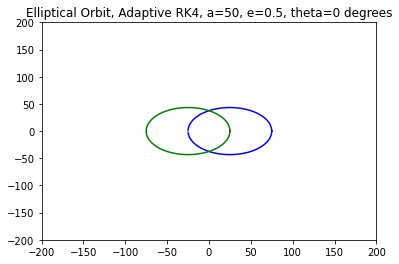

In [101]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Elliptical Orbit, Adaptive RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [102]:
def getfocus(a,ecc):
    c=a*ecc
    return c

In [103]:
def getsemiminor(a,ecc):
    c=getfocus(a,ecc)
    b=np.sqrt(a**2-c**2)
    return b

In [104]:
def getxtheory2(theta0,ecc0,rad0,t, sgn):
    focus=getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    xtheory=sgn*focus*np.cos(theta0)+xdim*np.cos(t)*np.cos(theta0)-ydim*np.sin(t)*np.sin(theta0)
    return xtheory

In [105]:
def getytheory2(theta0, ecc0, rad0, t, sgn):
    focus = getfocus(rad0,ecc0)
    b=getsemiminor(rad0,ecc0)
    xdim=rad0
    ydim=b
    ytheory=sgn*focus*np.sin(theta0)+ydim*np.cos(theta0)*np.sin(t)+xdim*np.sin(theta0)*np.cos(t)
    return ytheory



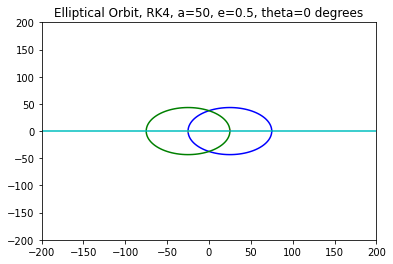

In [106]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

With adaptive step size I get inspirals!

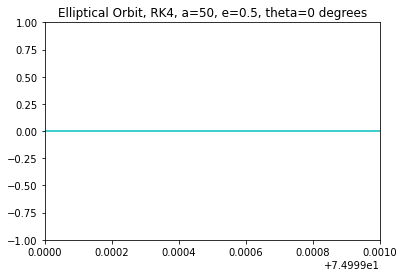

In [107]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

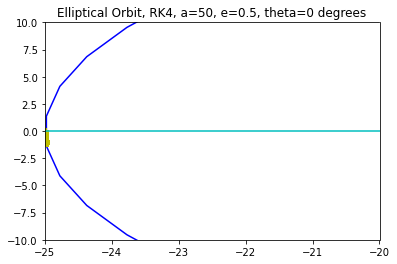

In [109]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

# Conservation of angular momentum

In [24]:
import Lstability

In [25]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

(1.7259632501946906e-14, -2.041241452319308)

In [26]:
deltaL*Lavg

-3.523107731477164e-14

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [27]:
import Estability

In [28]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

(2.773901534181869e-14, -0.005000000000000093)

In [29]:
deltaE*Eavg

-1.3869507670909603e-16

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [30]:
import orbitSymmetricTol

In [31]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [32]:
allcancelsx

1e-14

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [33]:
allcancelsa

1e-14

In [34]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.26631401e-05,  0.00000000e+00,
         4.13576424e-08, -1.22474487e-01,  0.00000000e+00],
       [-2.50000000e+01, -2.49105888e-05,  0.00000000e+00,
         8.13576424e-08, -1.22474487e-01,  0.00000000e+00],
       ...,
       [-2.49998001e+01, -1.22437834e-01,  0.00000000e+00,
         3.99878693e-04, -1.22473508e-01,  0.00000000e+00],
       [-2.49998001e+01, -1.22450082e-01,  0.00000000e+00,
         3.99918693e-04, -1.22473508e-01,  0.00000000e+00],
       [-2.49998000e+01, -1.22462329e-01,  0.00000000e+00,
         3.99958692e-04, -1.22473508e-01,  0.00000000e+00]])

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [35]:
import aeTest

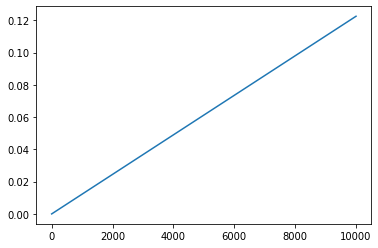

In [36]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [37]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [38]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

1
0
0
inf
1
1 1
1.0


<ipython-input-37-b048c29b70bf>:9: RuntimeWarning: divide by zero encountered in long_scalars
  print(apindex/perindex)
<ipython-input-37-b048c29b70bf>:10: RuntimeWarning: divide by zero encountered in long_scalars
  if np.abs(apindex/perindex-2.)>0.05:


In [39]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [40]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

(1,
 1,
 [-24.99999999999786, -1.2663140093603043e-05],
 [-24.99999999999786, -1.2663140093603043e-05],
 25.000000000001066,
 25.000000000001066,
 0.0,
 25.000000000001066,
 1.0,
 0.4999999999999787)

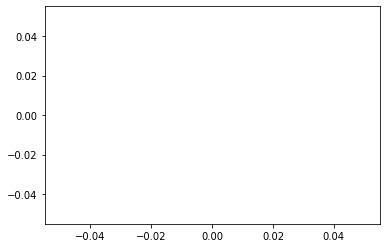

In [41]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Testing for symmetry within a given star's orbit about the line created by the initial angle with the origin that should pass thorugh the center of the ellipse, both focuses, and perihelion and aphelion

In [42]:
pivotindex=perindex
endindex = apindex
if useperihelion:
    pivotindex=apindex
    endindex=perindex

In [43]:
tosum1=list(range(0,endindex+1))
tosum2=list(range(endindex+1,pivotindex+1))

In [44]:
len(tosum1)

2

In [45]:
len(tosum2)

0

In [46]:
apindex,perindex

(1, 1)

In [47]:
revtosum2=tosum2.reverse()

In [48]:
xsum=np.zeros(endindex+1)
ysum=np.zeros(endindex+1)
for index in np.arange(0,pivotindex):
    xsum[index]=npstar1x[index,0]+npstar1x[pivotindex+1-index,0]
    ysum[index]=npstar1x[index,1]+npstar1x[pivotindex+1-index,1]

In [49]:
xsum=xsum/2

In [50]:
ysum=ysum/2

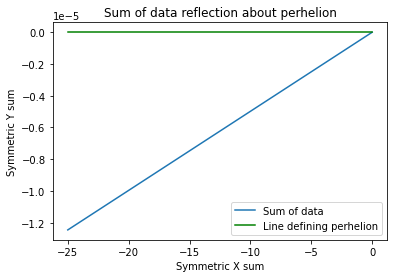

In [51]:
import matplotlib.pyplot as plt
b0=np.tan(theta0)
plt.plot(xsum,ysum,label="Sum of data")
plt.plot(xsum,b0*xsum, color="green", label="Line defining perhelion")
plt.xlabel("Symmetric X sum")
plt.ylabel("Symmetric Y sum")
plt.legend()
plt.title("Sum of data reflection about perhelion")
plt.show()

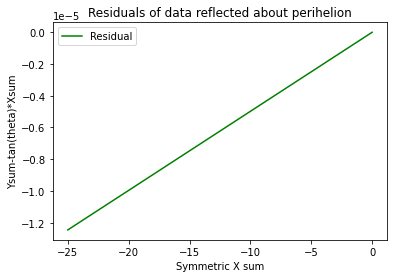

In [52]:
plt.plot(xsum,ysum-np.tan(theta0)*xsum, color="green", label="Residual")
plt.xlabel("Symmetric X sum")
plt.ylabel("Ysum-tan(theta)*Xsum")
plt.title("Residuals of data reflected about perihelion")
plt.legend()
plt.show()

The residual improves substantially from .2 at perihelion with a timestep of dt=1 to .125 at perihelion with a timestep of dt=.3 to .02 at perihelion with a timestep of dt=.1. I think timestep makes all the difference between adjacent pairs of points in resolving perihelion. I think it is difficult to tell how symmetric the orbit is by this method when the limitation is in the resolution of the orbit with timestep. Interpolation would be necessary to get a good picture of orbital shape. 

In the interest of accomplishing further orbital evolutions, I think I'm going to let the precice numerical characterization of orbital shape question go (the predicted and actual orbits overlap quite nicely) and move on to evolving parabolic and hyperbolic orbits. 

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [53]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [54]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [55]:
ellipsecenter

array([-2.50000000e+01, -1.26631401e-05])

In [56]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [57]:
(np.array(coordap)+np.array(coordper))/2

array([-2.50000000e+01, -1.26631401e-05])

In [58]:
getEllipsecenter(ecc0,rad0,theta0, True)

[-25.0, -0.0]

In [59]:
np.arctan2(-1.,0)/math.pi*180

-90.0

In [60]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [61]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

-3.1412939168636456

In [62]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [63]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [64]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [65]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [66]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [67]:
endindex

1

In [68]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

0
[] [] []
Eang []


In [69]:
nptimesoneorbit=nptimes[0:endindex-1]

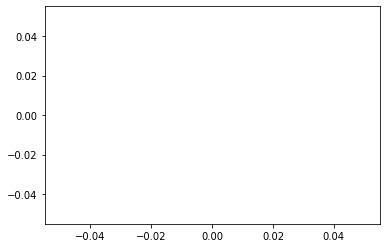

In [70]:
plt.plot(Eang0, xE0)

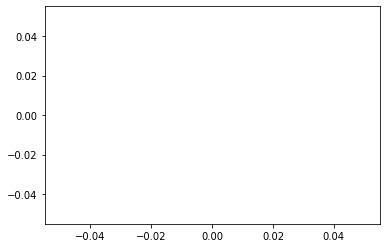

In [71]:
plt.plot(Eang0, yE0)

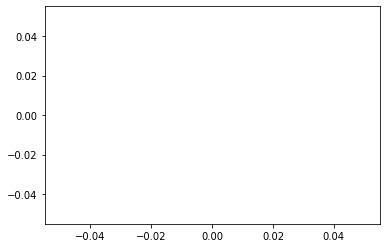

In [72]:
plt.plot(xE0,yE0)

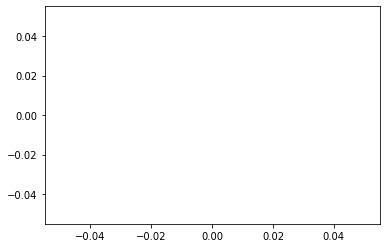

In [73]:
plt.plot(nptimesoneorbit,xE0)

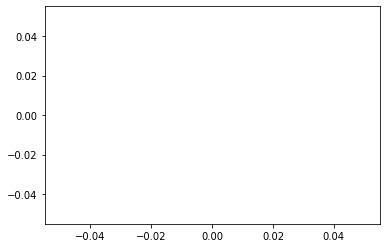

In [74]:
plt.plot(nptimesoneorbit,yE0)

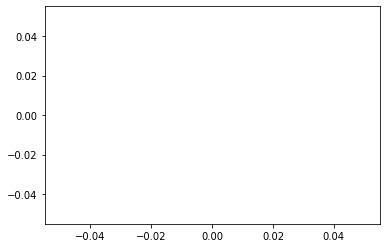

In [75]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [76]:
np.arctan(0./1.)

0.0

In [77]:
yE0[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


# THERE IS A SECOND HARMONIC IN THIS TIMING DATA!!! I have heard of orbital resonances. Is that what I am seeing?

In [ ]:
from matplotlib import pyplot as plt

Arctan function is giving tangent output. I'm done for today. I'm asking for help on this, either Steve or on a forum. Clearly something really weird is going on. This is a distinct problem from the retrograde motion I had before I fixed the center, which you can tell from the sharply spiked top as opposed to the curved top I had before. Now the center appears to be in the correct location but there is some problem related to tangent versus arctangent. 

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

Retrograde motion as seen from the center of mass. I'm not sure that makes sense. So there's a problem with the definition of the Eang. The problem might be with the ellipse center, which probably shouldn't be at x=-70, if it spans between +5 and -95. 

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Eccentricity fit is still not great for eccentricity of 0.9 (0.99), but radius fit is pretty good. The chi square is enormous. Eccentricity of 0.5 looks somewhat better (ecc 0.51) but still has a large chisquared and generates a potentially helpful divide by zero warning in the fit. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

Updated Jupyter and python packages and angular momentum and energy conservation improved by many orders of magnitude, but the fit is about the same. deltaL and deltaE are now consistent with roundoff error. 

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5